In [ ]:
import os
import re
import sys
import glob
import hashlib
from pathlib import Path
from typing import Tuple, List
from datetime import datetime

# Data manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Statistical modeling
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib_venn import venn3
import seaborn as sns

# Import master folder from config 
import sys
from config import master_folder

#Alternative master_folder import for the repository that also has non-anonymized data: 
#sys.path.append('..')
#from config import anonymized_folder as master_folder

data_path = os.path.join(master_folder, "analysis", "data")

# Try to find the most recent working folder and extract timestamp
try:
    working_folders = glob.glob(os.path.join(data_path, "working_*"))
    if not working_folders:
        raise FileNotFoundError("No working folders found")
        
    # Sort by modification time (newest first)
    most_recent_folder = max(working_folders, key=os.path.getmtime)
    # Extract the timestamp from the folder name
    folder_name = os.path.basename(most_recent_folder)
    timestamp = folder_name.replace("working_", "")
    print(f"Using existing timestamp: {timestamp}")
except FileNotFoundError:
    # Only create a timestamp if explicitly required by other code
    # No automatic timestamp creation here
    timestamp = None
    print("No existing timestamp found. A timestamp must be provided explicitly.")

# Create paths using the determined timestamp
if timestamp:
    analysis_path = os.path.join(data_path, f"working_{timestamp}")
    figures_path = os.path.join(analysis_path, "figures")
    tables_path = os.path.join(analysis_path, "tables")
    debug_path = os.path.join(master_folder, 'analysis', 'debug')

    # Create directories if they don't exist
    for path in [analysis_path, figures_path, tables_path, debug_path]:
        os.makedirs(path, exist_ok=True)
        print(f"Directory created/verified: {path}")

    print("\nFinal paths:")
    print(f"Analysis path: {analysis_path}")
    print(f"Figures path: {figures_path}")
    print(f"Tables path: {tables_path}")
    print(f"Debug path: {debug_path}")
else:
    print("No timestamp available. Cannot create working directories.")

NameError: name 'data_path' is not defined

# Sensitive to Outliers Analysis 

In [ ]:
task1_df = pd.read_csv(os.path.join(analysis_path, "task1_data_cleaned.csv"))
task2_df = pd.read_csv(os.path.join(analysis_path, "task2_data_cleaned.csv"))
task3_df = pd.read_csv(os.path.join(analysis_path, "task3_data_cleaned.csv"))
task4_df = pd.read_csv(os.path.join(analysis_path, "task4_data_cleaned.csv"))
task5_df = pd.read_csv(os.path.join(analysis_path, "task5_data_cleaned.csv"))
task6_df = pd.read_csv(os.path.join(analysis_path, "task6_data_cleaned.csv"))

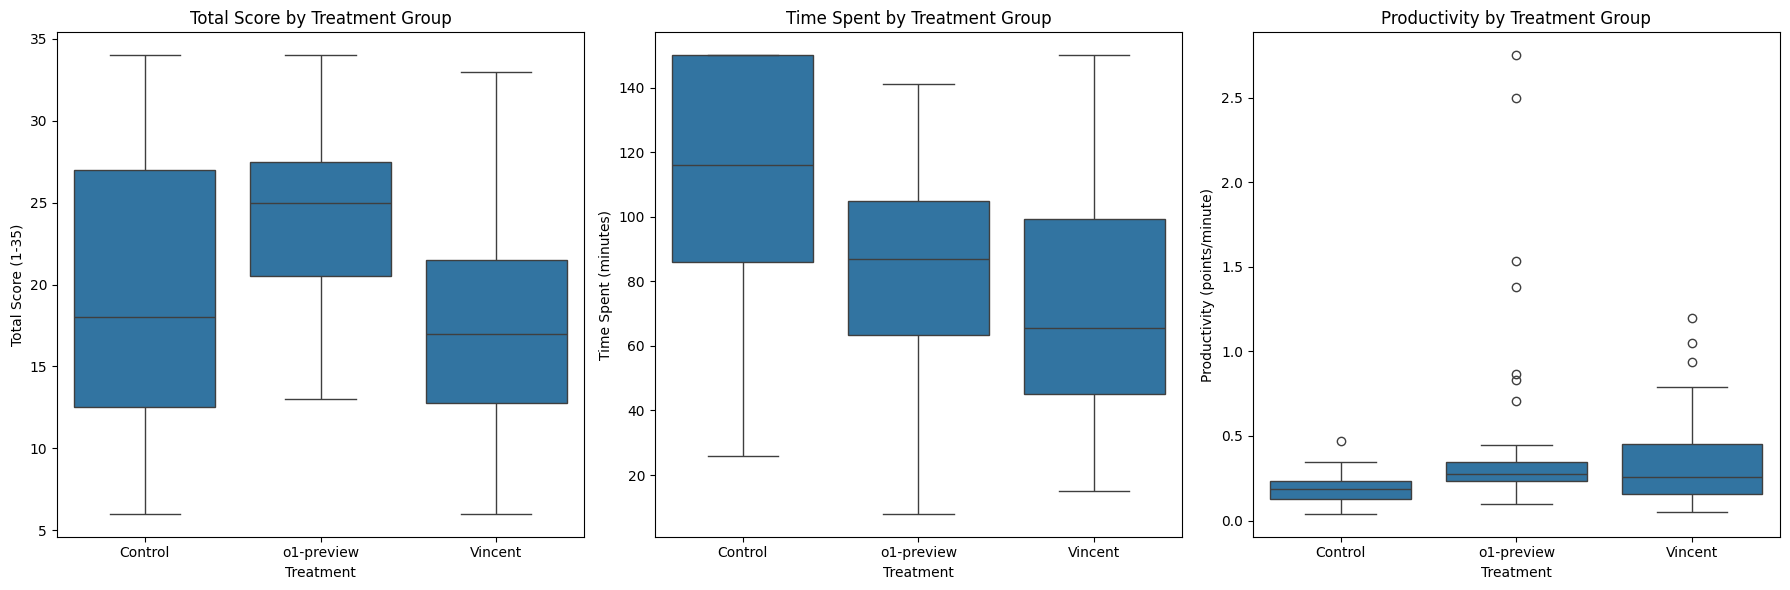

Descriptive Statistics for Task 6:

Total Score:
            count       mean       std   min    25%   50%   75%   max
Treatment                                                            
Control      39.0  19.564103  8.210375   6.0  12.50  18.0  27.0  34.0
Vincent      44.0  17.818182  7.121121   6.0  12.75  17.0  21.5  33.0
o1-preview   43.0  23.651163  5.520023  13.0  20.50  25.0  27.5  34.0

Time Spent:
            count        mean        std   min   25%    50%     75%    max
Treatment                                                                 
Control      39.0  110.717949  35.783669  26.0  86.0  116.0  150.00  150.0
Vincent      44.0   72.272727  39.150493  15.0  45.0   65.5   99.25  150.0
o1-preview   43.0   81.813953  34.839261   8.0  63.5   87.0  105.00  141.0

Productivity:
            count      mean       std       min       25%       50%       75%  \
Treatment                                                                       
Control      39.0  0.192837  0.08769

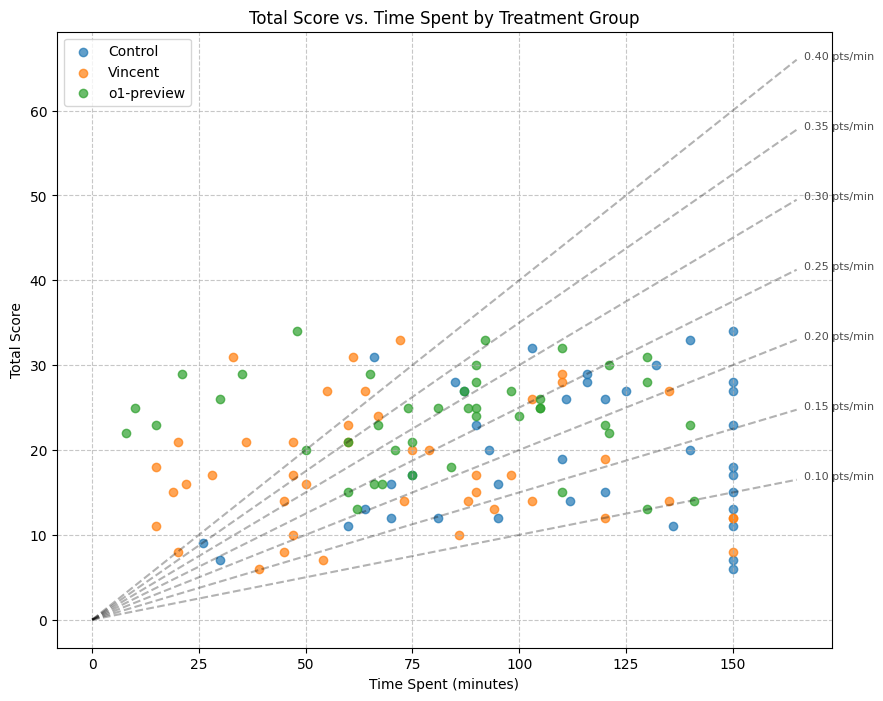


Mean Productivity:
Control: 0.1928
Vincent: 0.3512 (82.1% increase)
o1-preview: 0.4638 (140.5% increase)

t-test comparing o1-preview to Control:
t-statistic: 3.1040
p-value: 0.0033

ANALYSIS WITH 10% WINSORIZATION

Winsorized Values (10th-90th percentile):

Control group winsorized values:
Bounds: Lower=0.0855, Upper=0.3104
Number of values winsorized: 8 (20.5% of group)
Winsorized values:
     P6_Total_Score  Time_Spent_Assignment_6  P6_Productivity
9              11.0                    136.0         0.080882
23              7.0                    150.0         0.046667
44             11.0                    150.0         0.073333
57             32.0                    103.0         0.310680
65             28.0                     85.0         0.329412
75              6.0                    150.0         0.040000
88              9.0                     26.0         0.346154
114            31.0                     66.0         0.469697

Vincent group winsorized values:
Bounds: Lower

<Figure size 1500x1000 with 0 Axes>

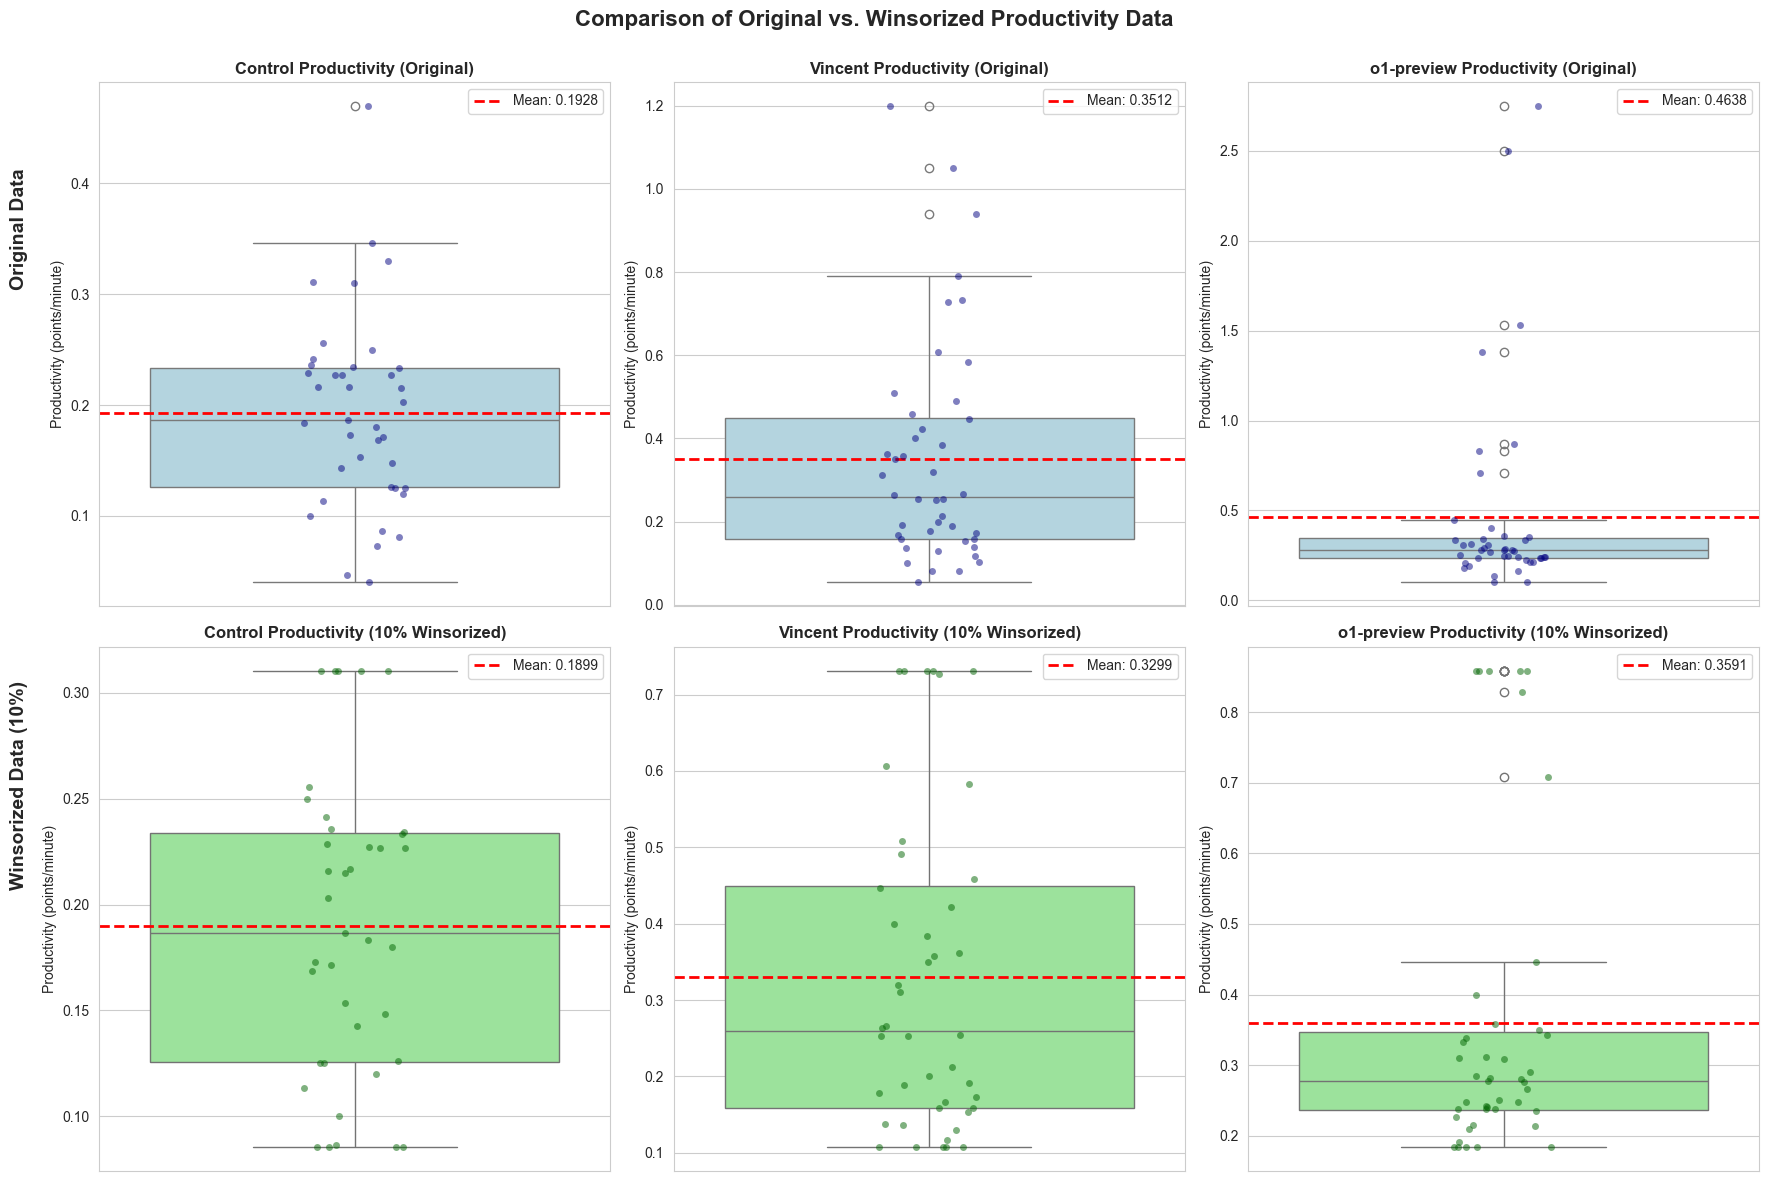

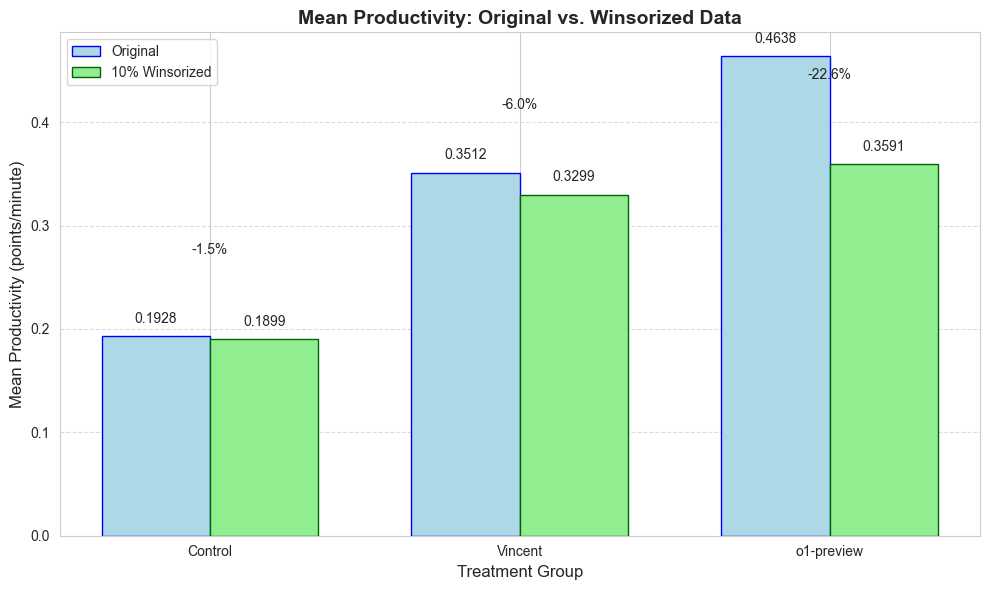


Comparison of Results Across Methods:
        Method  Control Mean  Vincent Mean Vincent % Increase Vincent p-value  o1-preview Mean o1-preview % Increase o1-preview p-value
      Original      0.192837      0.351151              82.1%          0.0005         0.463750                140.5%             0.0033
10% Winsorized      0.189936      0.329918              73.7%          0.0001         0.359133                 89.1%             0.0000

Variance Reduction from Winsorization:
Control: 0.007690 → 0.004974 (-35.3% change)
Vincent: 0.072833 → 0.043699 (-40.0% change)
o1-preview: 0.319079 → 0.048608 (-84.8% change)

SUMMARY OF FINDINGS
1. Vincent Effect:
   - Statistically significant in both original and winsorized data

2. o1-preview Effect:
   - Statistically significant in both original and winsorized data

3. Impact of Winsorization:
   - Mean productivity values changed by:
     * Control: -1.5%
     * Vincent: -6.0%
     * o1-preview: -22.6%
   - Variance reduced by:
     * Co

In [ ]:
# Define the columns we need based on your data structure
score_cols = [
    'P6_Criteria_1_Accuracy',
    'P6_Criteria_2_Analysis',
    'P6_Criteria_3_Organization',
    'P6_Criteria_4_Clarity',
    'P6_Criteria_5_Professionalism'
]
total_score_col = 'P6_Total_Score'
time_spent_col = 'Time_Spent_Assignment_6'
productivity_col = 'P6_Productivity'
treatment_col = 'AI_Condition'

# Create a treatment mapping for the AI_Condition column
treatment_map = {
    'No AI': 'Control',
    'Vincent': 'Vincent',
    'GPT 01': 'o1-preview'  # Assuming "GPT 01" is the label for o1-preview
}

# Create a figure with three subplots (boxplots for each metric by treatment group)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Map the AI condition to treatment groups
task6_df['Treatment'] = task6_df[treatment_col].map(treatment_map)

# Plot 1: Total Score by treatment group
sns.boxplot(x='Treatment', y=total_score_col, data=task6_df, ax=axes[0])
axes[0].set_title('Total Score by Treatment Group')
axes[0].set_ylabel('Total Score (1-35)')

# Plot 2: Time Spent by treatment group
sns.boxplot(x='Treatment', y=time_spent_col, data=task6_df, ax=axes[1])
axes[1].set_title('Time Spent by Treatment Group')
axes[1].set_ylabel('Time Spent (minutes)')

# Plot 3: Productivity by treatment group
sns.boxplot(x='Treatment', y=productivity_col, data=task6_df, ax=axes[2])
axes[2].set_title('Productivity by Treatment Group')
axes[2].set_ylabel('Productivity (points/minute)')

plt.tight_layout()
plt.show()

# Now let's look for outliers in each group
print("Descriptive Statistics for Task 6:")
print("\nTotal Score:")
print(task6_df.groupby('Treatment')[total_score_col].describe())

print("\nTime Spent:")
print(task6_df.groupby('Treatment')[time_spent_col].describe())

print("\nProductivity:")
print(task6_df.groupby('Treatment')[productivity_col].describe())

# Function to identify outliers using IQR method
def find_outliers(group, column):
    q1 = group[column].quantile(0.25)
    q3 = group[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to winsorize data at specified percentile
def winsorize_data(group, column, percentile=0.10):
    """
    Winsorize data by replacing values below the bottom percentile with the value at that percentile,
    and values above the top percentile with the value at that percentile.
    
    Args:
        group: DataFrame containing the data
        column: Column name to winsorize
        percentile: Percentile to use for winsorization (e.g., 0.10 for 10%)
        
    Returns:
        DataFrame with winsorized data, and the lower and upper bounds used
    """
    # Make a copy of the dataframe
    winsorized_group = group.copy()
    
    # Calculate the percentiles
    lower_bound = group[column].quantile(percentile)
    upper_bound = group[column].quantile(1 - percentile)
    
    # Identify values outside the bounds
    below_mask = winsorized_group[column] < lower_bound
    above_mask = winsorized_group[column] > upper_bound
    
    # Get outliers for reporting
    outliers = group[below_mask | above_mask].copy()
    
    # Replace values outside the bounds with the bounds
    winsorized_group.loc[below_mask, column] = lower_bound
    winsorized_group.loc[above_mask, column] = upper_bound
    
    return winsorized_group, outliers, lower_bound, upper_bound

# Find outliers in each group for productivity
print("\nOutliers in Productivity:")
for treatment in set(task6_df['Treatment'].dropna()):
    group = task6_df[task6_df['Treatment'] == treatment]
    outliers, lower, upper = find_outliers(group, productivity_col)
    if not outliers.empty:
        print(f"\n{treatment} group outliers (IQR method):")
        print(outliers[[total_score_col, time_spent_col, productivity_col]])
        print(f"IQR bounds: Lower={lower:.4f}, Upper={upper:.4f}")
    else:
        print(f"\nNo outliers found in {treatment} group")

# Create a scatter plot to visualize the relationship between Total Score and Time Spent
plt.figure(figsize=(10, 8))
for treatment, group in task6_df.groupby('Treatment'):
    plt.scatter(group[time_spent_col], group[total_score_col], 
                label=treatment, alpha=0.7)

plt.xlabel('Time Spent (minutes)')
plt.ylabel('Total Score')
plt.title('Total Score vs. Time Spent by Treatment Group')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add contour lines for constant productivity
productivity_levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
time_range = np.linspace(0, task6_df[time_spent_col].max() * 1.1, 100)

for prod in productivity_levels:
    scores = prod * time_range
    plt.plot(time_range, scores, 'k--', alpha=0.3)
    # Add label at the end of each contour line
    plt.text(time_range[-1], scores[-1], f'  {prod:.2f} pts/min', fontsize=8, alpha=0.7)

plt.show()

# Calculate percentage improvement in productivity
# First we need to filter out NaN values
valid_data = task6_df.dropna(subset=[productivity_col, treatment_col])

control_data = valid_data[valid_data[treatment_col] == 'No AI'][productivity_col]
o1_data = valid_data[valid_data[treatment_col] == 'GPT 01'][productivity_col]
vincent_data = valid_data[valid_data[treatment_col] == 'Vincent'][productivity_col]

control_mean = control_data.mean()
o1_mean = o1_data.mean() if not o1_data.empty else np.nan
vincent_mean = vincent_data.mean() if not vincent_data.empty else np.nan

print(f"\nMean Productivity:")
print(f"Control: {control_mean:.4f}")
if not np.isnan(vincent_mean):
    print(f"Vincent: {vincent_mean:.4f} ({((vincent_mean/control_mean)-1)*100:.1f}% increase)")
else:
    print("Vincent: No data available")
    
if not np.isnan(o1_mean):
    print(f"o1-preview: {o1_mean:.4f} ({((o1_mean/control_mean)-1)*100:.1f}% increase)")
else:
    print("o1-preview: No data available")

# Perform a t-test to compare o1-preview to Control if data is available
if not o1_data.empty and not control_data.empty:
    t_stat, p_val = stats.ttest_ind(o1_data, control_data, equal_var=False)
    
    print(f"\nt-test comparing o1-preview to Control:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
else:
    print("\nCannot perform t-test: Insufficient data")

# NEW SECTION: Instead of removing outliers, let's use winsorization at 10%
print("\n" + "="*60)
print("ANALYSIS WITH 10% WINSORIZATION")
print("="*60)

# Apply winsorization to each treatment group
control_group = valid_data[valid_data[treatment_col] == 'No AI']
vincent_group = valid_data[valid_data[treatment_col] == 'Vincent']
o1_group = valid_data[valid_data[treatment_col] == 'GPT 01']

# Winsorize each group separately to avoid biasing the analysis
control_wins, control_outliers, c_lower, c_upper = winsorize_data(control_group, productivity_col, 0.10)
vincent_wins, vincent_outliers, v_lower, v_upper = winsorize_data(vincent_group, productivity_col, 0.10)
o1_wins, o1_outliers, o_lower, o_upper = winsorize_data(o1_group, productivity_col, 0.10)

# Combine the winsorized data
winsorized_df = pd.concat([control_wins, vincent_wins, o1_wins])

# Report on the winsorized values
print("\nWinsorized Values (10th-90th percentile):")
for treatment, group, outliers, lower, upper in [
    ('Control', control_wins, control_outliers, c_lower, c_upper),
    ('Vincent', vincent_wins, vincent_outliers, v_lower, v_upper),
    ('o1-preview', o1_wins, o1_outliers, o_lower, o_upper)
]:
    if not outliers.empty:
        print(f"\n{treatment} group winsorized values:")
        print(f"Bounds: Lower={lower:.4f}, Upper={upper:.4f}")
        print(f"Number of values winsorized: {len(outliers)} ({len(outliers)/len(group)*100:.1f}% of group)")
        print("Winsorized values:")
        print(outliers[[total_score_col, time_spent_col, productivity_col]])
    else:
        print(f"\nNo values winsorized in {treatment} group")

# Calculate means with winsorized data
control_mean_wins = control_wins[productivity_col].mean() if not control_wins.empty else np.nan
vincent_mean_wins = vincent_wins[productivity_col].mean() if not vincent_wins.empty else np.nan
o1_mean_wins = o1_wins[productivity_col].mean() if not o1_wins.empty else np.nan

print(f"\nMean Productivity (with 10% winsorization):")
print(f"Control: {control_mean_wins:.4f}")
if not np.isnan(vincent_mean_wins):
    print(f"Vincent: {vincent_mean_wins:.4f} ({((vincent_mean_wins/control_mean_wins)-1)*100:.1f}% increase)")
else:
    print("Vincent: No data available")
    
if not np.isnan(o1_mean_wins):
    print(f"o1-preview: {o1_mean_wins:.4f} ({((o1_mean_wins/control_mean_wins)-1)*100:.1f}% increase)")
else:
    print("o1-preview: No data available")

# Run t-test with winsorized data
if not o1_wins.empty and not control_wins.empty:
    t_stat_wins, p_val_wins = stats.ttest_ind(o1_wins[productivity_col], control_wins[productivity_col], equal_var=False)
    
    print(f"\nt-test comparing o1-preview to Control (with 10% winsorization):")
    print(f"t-statistic: {t_stat_wins:.4f}")
    print(f"p-value: {p_val_wins:.4f}")
else:
    print("\nCannot perform t-test with winsorized data: Insufficient data")

# Also run t-test for Vincent vs Control with winsorized data
if not vincent_wins.empty and not control_wins.empty:
    t_stat_wins_v, p_val_wins_v = stats.ttest_ind(vincent_wins[productivity_col], control_wins[productivity_col], equal_var=False)
    
    print(f"\nt-test comparing Vincent to Control (with 10% winsorization):")
    print(f"t-statistic: {t_stat_wins_v:.4f}")
    print(f"p-value: {p_val_wins_v:.4f}")
else:
    print("\nCannot perform t-test with winsorized data: Insufficient data")

# IMPROVED VISUALIZATION: Create a cleaner comparison of original vs winsorized data
# Set a consistent style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Create a 2x3 grid for the plots
treatment_names = ['Control', 'Vincent', 'o1-preview']
data_original = [control_data, vincent_data, o1_data]
data_winsorized = [control_wins[productivity_col], vincent_wins[productivity_col], o1_wins[productivity_col]]
mean_original = [control_mean, vincent_mean, o1_mean]
mean_winsorized = [control_mean_wins, vincent_mean_wins, o1_mean_wins]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# First row: Original data
for i, (name, data, mean_val) in enumerate(zip(treatment_names, data_original, mean_original)):
    # Boxplot for original data
    sns.boxplot(y=data, color='lightblue', ax=axes[0, i])
    
    # Add individual points for better visibility
    sns.stripplot(y=data, color='navy', alpha=0.5, jitter=True, ax=axes[0, i])
    
    # Add mean line
    axes[0, i].axhline(y=mean_val, color='red', linestyle='--', linewidth=2, 
                     label=f'Mean: {mean_val:.4f}')
    
    # Set titles and labels
    axes[0, i].set_title(f'{name} Productivity (Original)', fontsize=12, fontweight='bold')
    axes[0, i].set_ylabel('Productivity (points/minute)')
    axes[0, i].legend()

# Second row: Winsorized data
for i, (name, data, mean_val) in enumerate(zip(treatment_names, data_winsorized, mean_winsorized)):
    # Boxplot for winsorized data
    sns.boxplot(y=data, color='lightgreen', ax=axes[1, i])
    
    # Add individual points for better visibility
    sns.stripplot(y=data, color='darkgreen', alpha=0.5, jitter=True, ax=axes[1, i])
    
    # Add mean line
    axes[1, i].axhline(y=mean_val, color='red', linestyle='--', linewidth=2,
                     label=f'Mean: {mean_val:.4f}')
    
    # Set titles and labels
    axes[1, i].set_title(f'{name} Productivity (10% Winsorized)', fontsize=12, fontweight='bold')
    axes[1, i].set_ylabel('Productivity (points/minute)')
    axes[1, i].legend()

# Add row titles
fig.text(0.02, 0.75, 'Original Data', fontsize=14, fontweight='bold', rotation=90)
fig.text(0.02, 0.25, 'Winsorized Data (10%)', fontsize=14, fontweight='bold', rotation=90)

# Adjust subplot spacing
plt.tight_layout(rect=[0.03, 0, 1, 1])
plt.subplots_adjust(top=0.92)

# Add a main title
fig.suptitle('Comparison of Original vs. Winsorized Productivity Data', 
             fontsize=16, fontweight='bold')

plt.show()

# Create a bar chart comparing means
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(treatment_names))

# Create bars
bar1 = plt.bar(x - width/2, mean_original, width, label='Original', color='lightblue', edgecolor='blue')
bar2 = plt.bar(x + width/2, mean_winsorized, width, label='10% Winsorized', color='lightgreen', edgecolor='darkgreen')

# Add labels and title
plt.xlabel('Treatment Group', fontsize=12)
plt.ylabel('Mean Productivity (points/minute)', fontsize=12)
plt.title('Mean Productivity: Original vs. Winsorized Data', fontsize=14, fontweight='bold')
plt.xticks(x, treatment_names)
plt.legend()

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

add_labels(bar1)
add_labels(bar2)

# Add percentage change annotations
for i, (orig, wins) in enumerate(zip(mean_original, mean_winsorized)):
    percent_change = ((wins - orig) / orig) * 100
    plt.annotate(f'{percent_change:.1f}%', 
                xy=(i + width/2, wins + 0.02),
                xytext=(i, wins + 0.08),
                arrowprops=dict(arrowstyle='->'),
                ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a table comparing results across methods
results_data = {
    'Method': ['Original', '10% Winsorized'],
    'Control Mean': [control_mean, control_mean_wins],
    'Vincent Mean': [vincent_mean, vincent_mean_wins],
    'Vincent % Increase': [((vincent_mean/control_mean)-1)*100, ((vincent_mean_wins/control_mean_wins)-1)*100],
    'Vincent p-value': [stats.ttest_ind(vincent_data, control_data, equal_var=False)[1] if not vincent_data.empty and not control_data.empty else np.nan,
                        p_val_wins_v if not vincent_wins.empty and not control_wins.empty else np.nan],
    'o1-preview Mean': [o1_mean, o1_mean_wins],
    'o1-preview % Increase': [((o1_mean/control_mean)-1)*100, ((o1_mean_wins/control_mean_wins)-1)*100],
    'o1-preview p-value': [p_val, p_val_wins]
}

results_df = pd.DataFrame(results_data)

# Format the percentage columns
results_df['Vincent % Increase'] = results_df['Vincent % Increase'].map('{:.1f}%'.format)
results_df['o1-preview % Increase'] = results_df['o1-preview % Increase'].map('{:.1f}%'.format)

# Format the p-value columns
results_df['Vincent p-value'] = results_df['Vincent p-value'].map('{:.4f}'.format)
results_df['o1-preview p-value'] = results_df['o1-preview p-value'].map('{:.4f}'.format)

print("\nComparison of Results Across Methods:")
print(results_df.to_string(index=False))

# Calculate and report variance reduction from winsorization
control_var_orig = control_data.var()
control_var_wins = control_wins[productivity_col].var()
vincent_var_orig = vincent_data.var()
vincent_var_wins = vincent_wins[productivity_col].var()
o1_var_orig = o1_data.var()
o1_var_wins = o1_wins[productivity_col].var()

print("\nVariance Reduction from Winsorization:")
print(f"Control: {control_var_orig:.6f} → {control_var_wins:.6f} ({(control_var_wins/control_var_orig-1)*100:.1f}% change)")
print(f"Vincent: {vincent_var_orig:.6f} → {vincent_var_wins:.6f} ({(vincent_var_wins/vincent_var_orig-1)*100:.1f}% change)")
print(f"o1-preview: {o1_var_orig:.6f} → {o1_var_wins:.6f} ({(o1_var_wins/o1_var_orig-1)*100:.1f}% change)")

# Summary and conclusions
print("\n" + "="*60)
print("SUMMARY OF FINDINGS")
print("="*60)

# Compare significance results
o1_sig_orig = p_val < 0.05
o1_sig_wins = p_val_wins < 0.05
vincent_sig_orig = stats.ttest_ind(vincent_data, control_data, equal_var=False)[1] < 0.05 if not vincent_data.empty and not control_data.empty else False
vincent_sig_wins = p_val_wins_v < 0.05 if not vincent_wins.empty and not control_wins.empty else False

print(f"1. Vincent Effect:")
if vincent_sig_orig and vincent_sig_wins:
    print("   - Statistically significant in both original and winsorized data")
elif vincent_sig_orig and not vincent_sig_wins:
    print("   - Statistically significant in original data but not after winsorization")
elif not vincent_sig_orig and vincent_sig_wins:
    print("   - Not significant in original data but becomes significant after winsorization")
else:
    print("   - Not statistically significant in either original or winsorized data")

print(f"\n2. o1-preview Effect:")
if o1_sig_orig and o1_sig_wins:
    print("   - Statistically significant in both original and winsorized data")
elif o1_sig_orig and not o1_sig_wins:
    print("   - Statistically significant in original data but not after winsorization")
elif not o1_sig_orig and o1_sig_wins:
    print("   - Not significant in original data but becomes significant after winsorization")
else:
    print("   - Not statistically significant in either original or winsorized data")

print("\n3. Impact of Winsorization:")
print(f"   - Mean productivity values changed by:")
print(f"     * Control: {(control_mean_wins/control_mean-1)*100:.1f}%")
print(f"     * Vincent: {(vincent_mean_wins/vincent_mean-1)*100:.1f}%")
print(f"     * o1-preview: {(o1_mean_wins/o1_mean-1)*100:.1f}%")
print(f"   - Variance reduced by:")
print(f"     * Control: {(1-control_var_wins/control_var_orig)*100:.1f}%")
print(f"     * Vincent: {(1-vincent_var_wins/vincent_var_orig)*100:.1f}%")
print(f"     * o1-preview: {(1-o1_var_wins/o1_var_orig)*100:.1f}%")

print("\n4. Recommendation:")
if (o1_sig_wins and not o1_sig_orig) or (vincent_sig_wins and not vincent_sig_orig):
    print("   - Winsorization at 10% is recommended as it reveals significant treatment effects")
    print("     not detected in the original data while preserving all data points.")
elif (o1_sig_orig and not o1_sig_wins) or (vincent_sig_orig and not vincent_sig_wins):
    print("   - Caution is advised with winsorization as it reduces some significant effects.")
    print("     Consider using the original data or a lower winsorization level.")
else:
    print("   - Winsorization at 10% is recommended as it reduces variance while maintaining")
    print("     the same statistical conclusions and preserving all data points.")

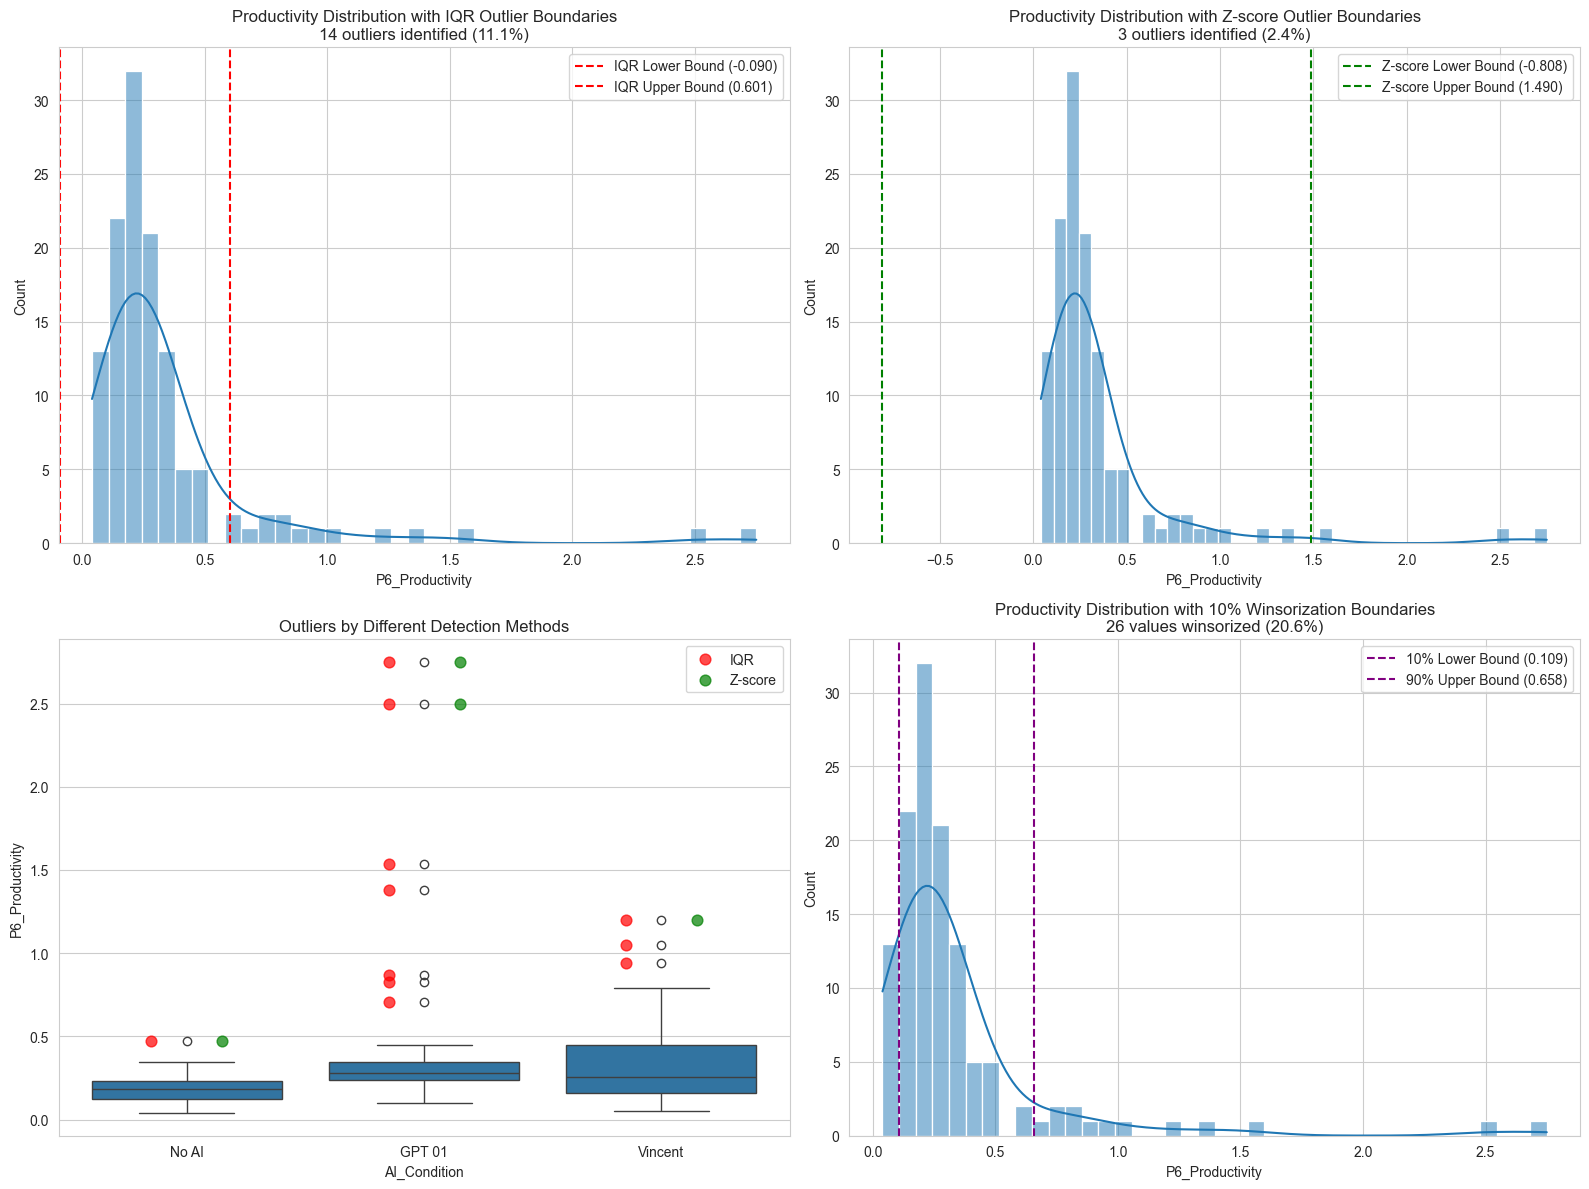

Comparison of Regression Results by Outlier Handling Method
Method          Control Mean    Vincent Effect  Vincent % Change Vincent p-val   o1 Effect       o1 % Change     o1 p-val        R²         N       
----------------------------------------------------------------------------------------------------
Full Data       0.1928          0.1583          82.1            0.0002          0.2709          140.5           0.0019          0.0823     126     
IQR Method      0.1856          0.1135          61.2            0.0005          0.0748          40.3            0.0000          0.1218     115     
Z-score         0.1856          0.1459          78.6            0.0001          0.1728          93.1            0.0003          0.0987     122     
Winsorized 10%  0.1899          0.1400          73.7            0.0000          0.1692          89.1            0.0000          0.1385     126     


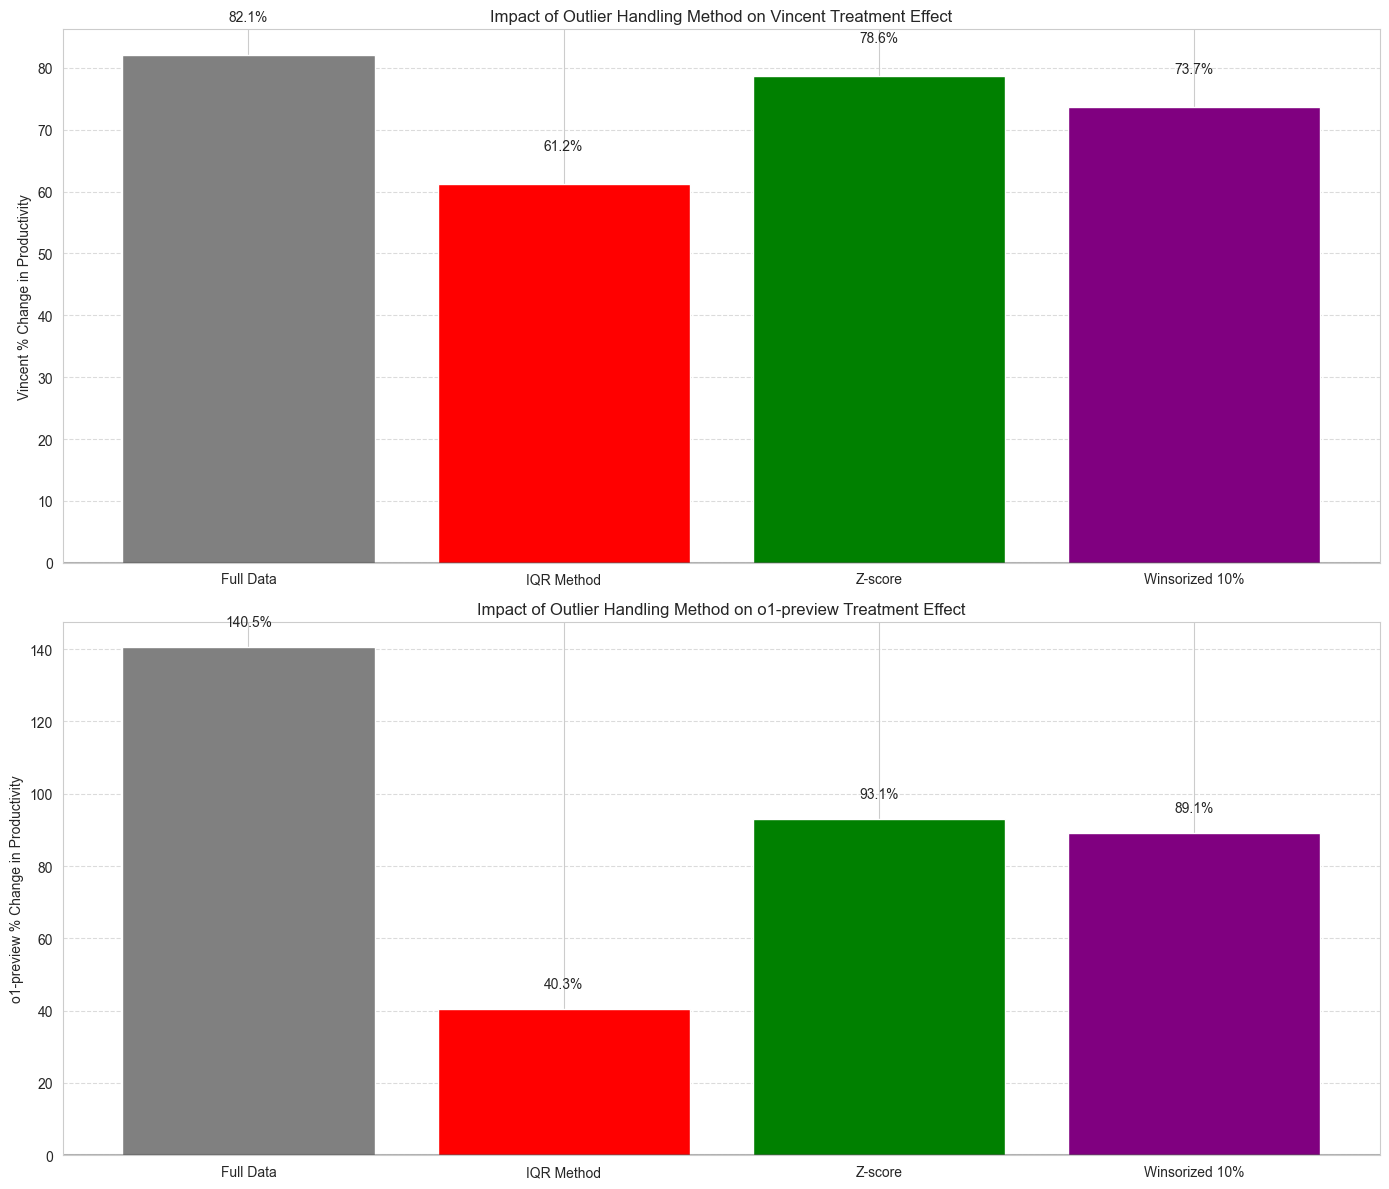


Outliers Identified by IQR Method:
    AI_Condition  P6_Total_Score  Time_Spent_Assignment_6  P6_Productivity
92        GPT 01            22.0                      8.0         2.750000
86        GPT 01            25.0                     10.0         2.500000
36        GPT 01            23.0                     15.0         1.533333
110       GPT 01            29.0                     21.0         1.380952
106      Vincent            18.0                     15.0         1.200000
21       Vincent            21.0                     20.0         1.050000
22       Vincent            31.0                     33.0         0.939394
67        GPT 01            26.0                     30.0         0.866667
85        GPT 01            29.0                     35.0         0.828571
61       Vincent            15.0                     19.0         0.789474
83       Vincent            11.0                     15.0         0.733333
101      Vincent            16.0                     22.0       

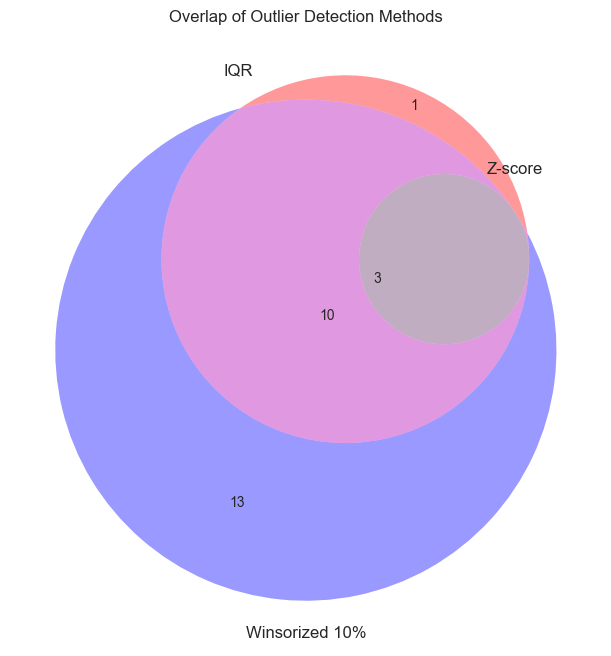

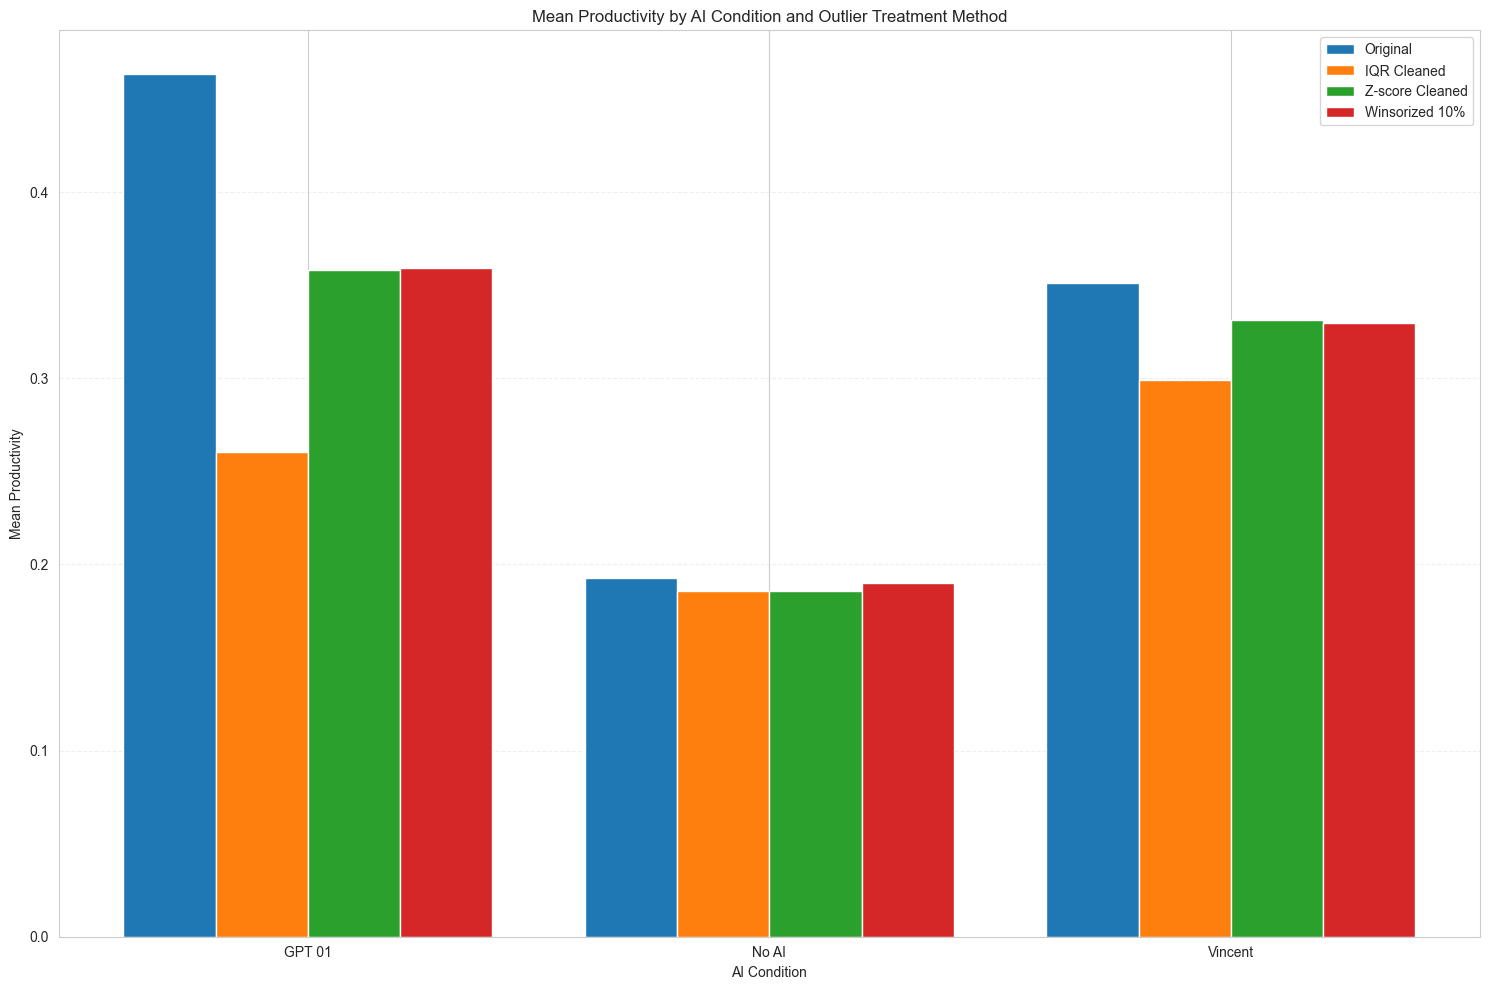


Summary of Mean Productivity by Condition and Method:
              Original  IQR Cleaned  Z-score Cleaned  Winsorized 10%  \
AI_Condition                                                           
GPT 01          0.4638       0.2604           0.3583          0.3591   
No AI           0.1928       0.1856           0.1856          0.1899   
Vincent         0.3512       0.2991           0.3314          0.3299   

              IQR Cleaned % Change  Z-score Cleaned % Change  \
AI_Condition                                                   
GPT 01                    -43.8550                  -22.7335   
No AI                      -3.7782                   -3.7782   
Vincent                   -14.8358                   -5.6217   

              Winsorized 10% % Change  
AI_Condition                           
GPT 01                       -22.5589  
No AI                         -1.5044  
Vincent                       -6.0469  

Summary of Productivity Variance by Condition and Method:
    

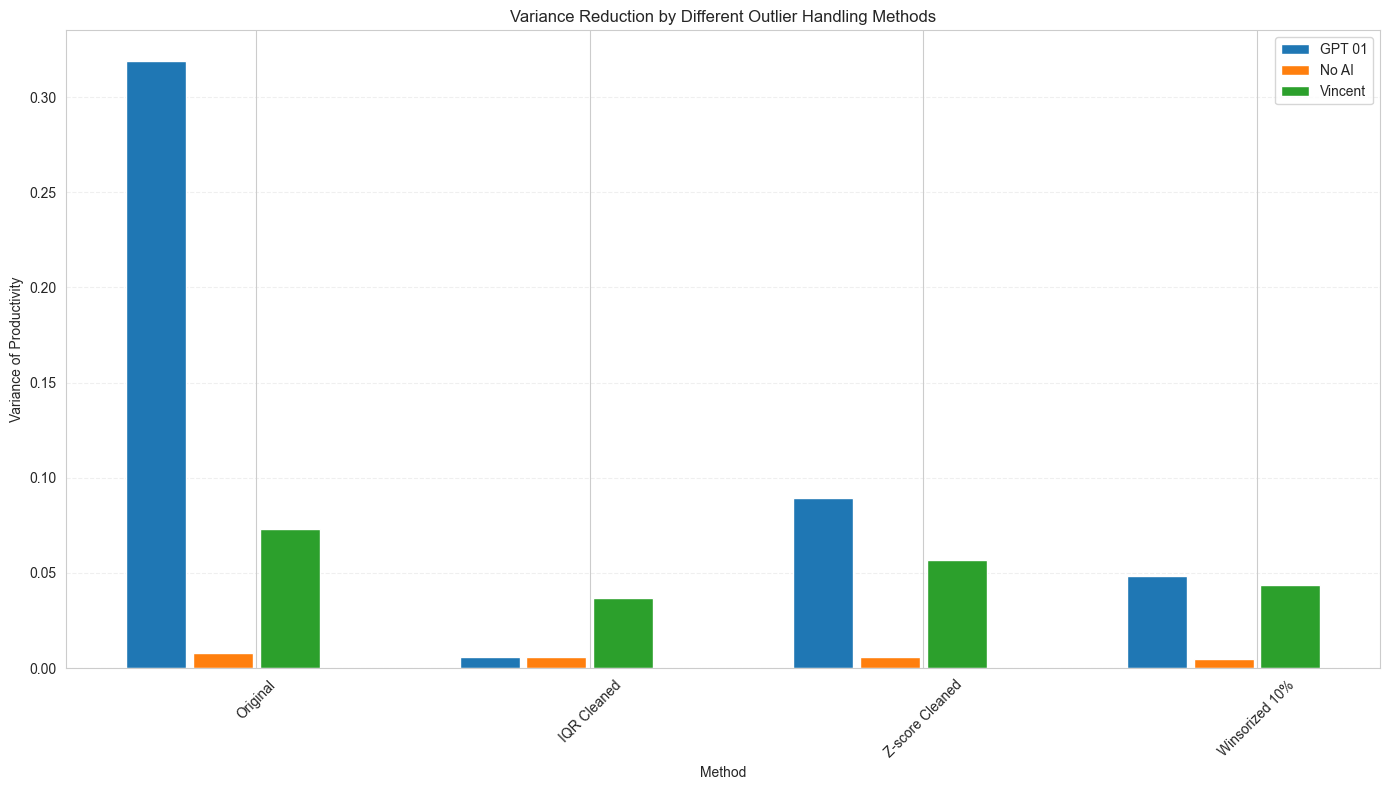


Statistical Significance Testing Between Methods:
----------------------------------------------------------------------------------------------------
Testing significant differences between Vincent and Control conditions:
Original: t=nan, p=nan, Mean diff: nan, % diff: nan%
IQR Cleaned: t=nan, p=nan, Mean diff: nan, % diff: nan%
Z-score Cleaned: t=nan, p=nan, Mean diff: nan, % diff: nan%
Winsorized 10%: t=nan, p=nan, Mean diff: nan, % diff: nan%

Testing significant differences between o1-preview and Control conditions:
Original: t=nan, p=nan, Mean diff: nan, % diff: nan%
IQR Cleaned: t=nan, p=nan, Mean diff: nan, % diff: nan%
Z-score Cleaned: t=nan, p=nan, Mean diff: nan, % diff: nan%
Winsorized 10%: t=nan, p=nan, Mean diff: nan, % diff: nan%


C:\Users\tomas\AppData\Local\Temp\ipykernel_49512\2241001736.py:390: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)


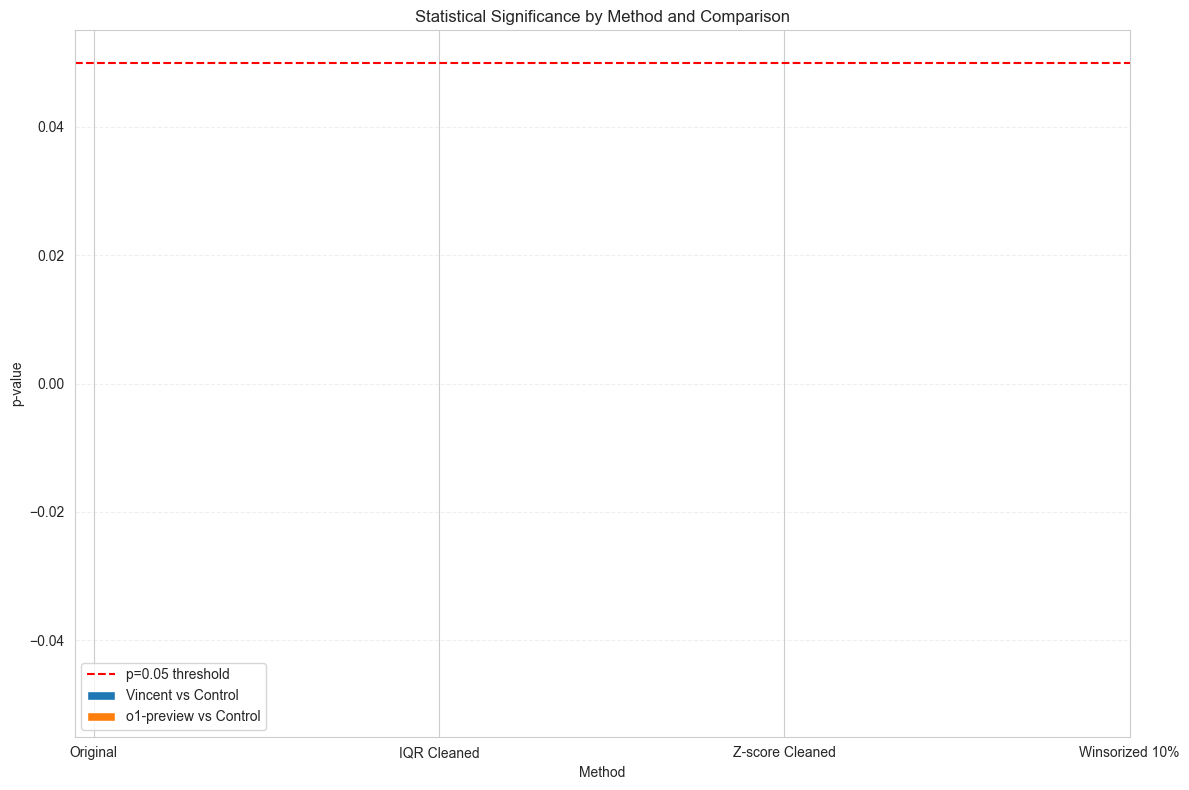

In [ ]:
# IQR method for finding outliers
def iqr_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-score method for finding outliers
def zscore_outliers(df, column, threshold=3.0):
    df_subset = df[column].dropna()
    mean = df_subset.mean()
    std = df_subset.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Winsorization function
def winsorize_data(df, column, percentile=0.10):
    """
    Winsorize data by replacing values below the bottom percentile with the value at that percentile,
    and values above the top percentile with the value at that percentile.
    
    Args:
        df: DataFrame containing the data
        column: Column name to winsorize
        percentile: Percentile to use for winsorization (e.g., 0.10 for 10%)
        
    Returns:
        DataFrame with winsorized data, and the lower and upper bounds used
    """
    # Make a copy of the dataframe
    winsorized_df = df.copy()
    
    # Calculate the percentiles
    lower_bound = df[column].quantile(percentile)
    upper_bound = df[column].quantile(1 - percentile)
    
    # Identify values outside the bounds
    below_mask = winsorized_df[column] < lower_bound
    above_mask = winsorized_df[column] > upper_bound
    
    # Get outliers for reporting
    outliers = df[below_mask | above_mask].copy()
    
    # Replace values outside the bounds with the bounds
    winsorized_df.loc[below_mask, column] = lower_bound
    winsorized_df.loc[above_mask, column] = upper_bound
    
    return winsorized_df, outliers, lower_bound, upper_bound

# Create a figure to compare distributions and outlier detection methods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Histogram with IQR outlier boundaries
valid_data = task6_df.dropna(subset=['P6_Productivity'])
sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[0, 0])
iqr_out, iqr_lower, iqr_upper = iqr_outliers(valid_data, 'P6_Productivity')
axes[0, 0].axvline(x=iqr_lower, color='r', linestyle='--', label=f'IQR Lower Bound ({iqr_lower:.3f})')
axes[0, 0].axvline(x=iqr_upper, color='r', linestyle='--', label=f'IQR Upper Bound ({iqr_upper:.3f})')
axes[0, 0].set_title(f'Productivity Distribution with IQR Outlier Boundaries\n{len(iqr_out)} outliers identified ({len(iqr_out)/len(valid_data)*100:.1f}%)')
axes[0, 0].legend()

# Plot 2: Histogram with Z-score outlier boundaries
sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[0, 1])
z_out, z_lower, z_upper = zscore_outliers(valid_data, 'P6_Productivity')
axes[0, 1].axvline(x=z_lower, color='g', linestyle='--', label=f'Z-score Lower Bound ({z_lower:.3f})')
axes[0, 1].axvline(x=z_upper, color='g', linestyle='--', label=f'Z-score Upper Bound ({z_upper:.3f})')
axes[0, 1].set_title(f'Productivity Distribution with Z-score Outlier Boundaries\n{len(z_out)} outliers identified ({len(z_out)/len(valid_data)*100:.1f}%)')
axes[0, 1].legend()

# Plot 3: Boxplot comparing all methods
sns.boxplot(x='AI_Condition', y='P6_Productivity', data=valid_data, ax=axes[1, 0])

# Add outliers from each method with different colors
for i, group in enumerate(valid_data['AI_Condition'].unique()):
    group_data = valid_data[valid_data['AI_Condition'] == group]
    
    # IQR outliers
    group_iqr_out, _, _ = iqr_outliers(group_data, 'P6_Productivity')
    if not group_iqr_out.empty:
        axes[1, 0].scatter(
            [i-0.15] * len(group_iqr_out), 
            group_iqr_out['P6_Productivity'],
            color='red', s=60, alpha=0.7, label='IQR' if i == 0 else ""
        )
    
    # Z-score outliers
    group_z_out, _, _ = zscore_outliers(group_data, 'P6_Productivity')
    if not group_z_out.empty:
        axes[1, 0].scatter(
            [i+0.15] * len(group_z_out), 
            group_z_out['P6_Productivity'],
            color='green', s=60, alpha=0.7, label='Z-score' if i == 0 else ""
        )

axes[1, 0].set_title('Outliers by Different Detection Methods')
axes[1, 0].legend()

# Plot 4: Histogram with 10% Winsorization boundaries
sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[1, 1])
winsorized_df, wins_out, wins_lower, wins_upper = winsorize_data(valid_data, 'P6_Productivity', 0.10)
axes[1, 1].axvline(x=wins_lower, color='purple', linestyle='--', label=f'10% Lower Bound ({wins_lower:.3f})')
axes[1, 1].axvline(x=wins_upper, color='purple', linestyle='--', label=f'90% Upper Bound ({wins_upper:.3f})')
axes[1, 1].set_title(f'Productivity Distribution with 10% Winsorization Boundaries\n{len(wins_out)} values winsorized ({len(wins_out)/len(valid_data)*100:.1f}%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Run regression analyses with all outlier detection methods
# First, prepare the data
def prepare_regression_data(df):
    regression_df = df.copy()
    regression_df['Vincent_dummy'] = (regression_df['AI_Condition'] == 'Vincent').astype(int)
    regression_df['o1_preview_dummy'] = (regression_df['AI_Condition'] == 'GPT 01').astype(int)
    return regression_df

def run_regression(df, outcome_var):
    reg_df = df.dropna(subset=[outcome_var, 'Vincent_dummy', 'o1_preview_dummy'])
    X = sm.add_constant(reg_df[['Vincent_dummy', 'o1_preview_dummy']])
    y = reg_df[outcome_var]
    model = sm.OLS(y, X)
    results = model.fit(cov_type='HC1')  # Using robust standard errors
    
    # Extract key values
    control_mean = results.params['const']
    vincent_effect = results.params['Vincent_dummy']
    o1_effect = results.params['o1_preview_dummy']
    
    # Calculate percent changes
    vincent_pct = (vincent_effect / control_mean) * 100 if control_mean != 0 else np.nan
    o1_pct = (o1_effect / control_mean) * 100 if control_mean != 0 else np.nan
    
    return {
        'control_mean': control_mean,
        'vincent_effect': vincent_effect,
        'o1_effect': o1_effect,
        'vincent_pct': vincent_pct,
        'o1_pct': o1_pct,
        'vincent_pval': results.pvalues['Vincent_dummy'],
        'o1_pval': results.pvalues['o1_preview_dummy'],
        'n': len(reg_df),
        'r_squared': results.rsquared,
        'adj_r_squared': results.rsquared_adj
    }

# Prepare the regression data
regression_data = prepare_regression_data(valid_data)

# Run regression with all data (baseline)
full_results = run_regression(regression_data, 'P6_Productivity')

# Remove IQR outliers and run regression
iqr_clean_data = regression_data.copy()
for group in iqr_clean_data['AI_Condition'].unique():
    group_data = iqr_clean_data[iqr_clean_data['AI_Condition'] == group]
    group_outliers, lower, upper = iqr_outliers(group_data, 'P6_Productivity')
    if not group_outliers.empty:
        for idx in group_outliers.index:
            iqr_clean_data.loc[idx, 'P6_Productivity'] = np.nan
iqr_results = run_regression(iqr_clean_data, 'P6_Productivity')

# Remove Z-score outliers and run regression
z_clean_data = regression_data.copy()
for group in z_clean_data['AI_Condition'].unique():
    group_data = z_clean_data[z_clean_data['AI_Condition'] == group]
    group_outliers, lower, upper = zscore_outliers(group_data, 'P6_Productivity')
    if not group_outliers.empty:
        for idx in group_outliers.index:
            z_clean_data.loc[idx, 'P6_Productivity'] = np.nan
z_results = run_regression(z_clean_data, 'P6_Productivity')

# Use Winsorized data for regression
# First, prepare winsorized data by group to avoid biasing the analysis
winsorized_reg_data = regression_data.copy()
for group in winsorized_reg_data['AI_Condition'].unique():
    group_data = winsorized_reg_data[winsorized_reg_data['AI_Condition'] == group]
    group_winsorized, _, _, _ = winsorize_data(group_data, 'P6_Productivity', 0.10)
    # Update the main dataframe with winsorized values for this group
    winsorized_reg_data.loc[group_data.index, 'P6_Productivity'] = group_winsorized['P6_Productivity'].values

# Run regression with winsorized data
winsorized_results = run_regression(winsorized_reg_data, 'P6_Productivity')

# Create a detailed comparison table
print("Comparison of Regression Results by Outlier Handling Method")
print("=" * 100)
print(f"{'Method':<15} {'Control Mean':<15} {'Vincent Effect':<15} {'Vincent % Change':<15} {'Vincent p-val':<15} {'o1 Effect':<15} {'o1 % Change':<15} {'o1 p-val':<15} {'R²':<10} {'N':<8}")
print("-" * 100)
print(f"{'Full Data':<15} {full_results['control_mean']:<15.4f} {full_results['vincent_effect']:<15.4f} {full_results['vincent_pct']:<15.1f} {full_results['vincent_pval']:<15.4f} {full_results['o1_effect']:<15.4f} {full_results['o1_pct']:<15.1f} {full_results['o1_pval']:<15.4f} {full_results['r_squared']:<10.4f} {full_results['n']:<8}")
print(f"{'IQR Method':<15} {iqr_results['control_mean']:<15.4f} {iqr_results['vincent_effect']:<15.4f} {iqr_results['vincent_pct']:<15.1f} {iqr_results['vincent_pval']:<15.4f} {iqr_results['o1_effect']:<15.4f} {iqr_results['o1_pct']:<15.1f} {iqr_results['o1_pval']:<15.4f} {iqr_results['r_squared']:<10.4f} {iqr_results['n']:<8}")
print(f"{'Z-score':<15} {z_results['control_mean']:<15.4f} {z_results['vincent_effect']:<15.4f} {z_results['vincent_pct']:<15.1f} {z_results['vincent_pval']:<15.4f} {z_results['o1_effect']:<15.4f} {z_results['o1_pct']:<15.1f} {z_results['o1_pval']:<15.4f} {z_results['r_squared']:<10.4f} {z_results['n']:<8}")
print(f"{'Winsorized 10%':<15} {winsorized_results['control_mean']:<15.4f} {winsorized_results['vincent_effect']:<15.4f} {winsorized_results['vincent_pct']:<15.1f} {winsorized_results['vincent_pval']:<15.4f} {winsorized_results['o1_effect']:<15.4f} {winsorized_results['o1_pct']:<15.1f} {winsorized_results['o1_pval']:<15.4f} {winsorized_results['r_squared']:<10.4f} {winsorized_results['n']:<8}")

# Plot the percent changes for comparison
methods = ['Full Data', 'IQR Method', 'Z-score', 'Winsorized 10%']
vincent_changes = [full_results['vincent_pct'], iqr_results['vincent_pct'], z_results['vincent_pct'], winsorized_results['vincent_pct']]
o1_changes = [full_results['o1_pct'], iqr_results['o1_pct'], z_results['o1_pct'], winsorized_results['o1_pct']]

# Create a figure for comparing treatment effects
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot Vincent effects
bars1 = ax1.bar(methods, vincent_changes, color=['gray', 'red', 'green', 'purple'])
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylabel('Vincent % Change in Productivity')
ax1.set_title('Impact of Outlier Handling Method on Vincent Treatment Effect')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + (5 if height > 0 else -5), 
            f'{height:.1f}%', ha='center', va=('bottom' if height > 0 else 'top'))

# Plot o1 effects
bars2 = ax2.bar(methods, o1_changes, color=['gray', 'red', 'green', 'purple'])
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_ylabel('o1-preview % Change in Productivity')
ax2.set_title('Impact of Outlier Handling Method on o1-preview Treatment Effect')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on the bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + (5 if height > 0 else -5), 
            f'{height:.1f}%', ha='center', va=('bottom' if height > 0 else 'top'))

plt.tight_layout()
plt.show()

# Print identified outliers by each method
print("\nOutliers Identified by IQR Method:")
print(iqr_out[['AI_Condition', 'P6_Total_Score', 'Time_Spent_Assignment_6', 'P6_Productivity']].sort_values('P6_Productivity', ascending=False))

print("\nOutliers Identified by Z-score Method:")
print(z_out[['AI_Condition', 'P6_Total_Score', 'Time_Spent_Assignment_6', 'P6_Productivity']].sort_values('P6_Productivity', ascending=False))

print("\nValues Winsorized (10%):")
print(wins_out[['AI_Condition', 'P6_Total_Score', 'Time_Spent_Assignment_6', 'P6_Productivity']].sort_values('P6_Productivity', ascending=False))

# Show overlap between methods
iqr_indices = set(iqr_out.index)
z_indices = set(z_out.index)
wins_indices = set(wins_out.index)

# Calculate overlaps
iqr_z_overlap = iqr_indices.intersection(z_indices)
iqr_wins_overlap = iqr_indices.intersection(wins_indices)
z_wins_overlap = z_indices.intersection(wins_indices)
all_methods_overlap = iqr_indices.intersection(z_indices).intersection(wins_indices)

print(f"\nNumber of outliers identified by IQR method: {len(iqr_indices)}")
print(f"Number of outliers identified by Z-score method: {len(z_indices)}")
print(f"Number of values winsorized (10%): {len(wins_indices)}")
print(f"Number of outliers identified by both IQR and Z-score: {len(iqr_z_overlap)}")
print(f"Number of outliers identified by all methods including winsorization: {len(all_methods_overlap)}")

# Create a comprehensive table showing which data points are flagged by which methods
all_flagged_indices = list(iqr_indices.union(z_indices).union(wins_indices))

# Create a DataFrame for the summary
method_summary = pd.DataFrame(index=all_flagged_indices)

# Mark which methods flagged each value
method_summary['IQR'] = [idx in iqr_indices for idx in all_flagged_indices]
method_summary['Z-score'] = [idx in z_indices for idx in all_flagged_indices]
method_summary['Winsorized 10%'] = [idx in wins_indices for idx in all_flagged_indices]
method_summary['Methods Flagging'] = method_summary.sum(axis=1)

# Add the original data
flagged_data = valid_data.loc[all_flagged_indices, ['AI_Condition', 'P6_Total_Score', 'Time_Spent_Assignment_6', 'P6_Productivity']]
method_summary = pd.concat([flagged_data, method_summary], axis=1)

# Sort by productivity in descending order
method_summary = method_summary.sort_values('P6_Productivity', ascending=False)

print("\nDetailed Method Comparison:")
print(method_summary.head(20))  # Show top 20 rows for brevity

# Visualize the agreement between methods with a Venn diagram-like approach
from matplotlib_venn import venn3

plt.figure(figsize=(12, 8))
venn3([iqr_indices, z_indices, wins_indices], 
      set_labels=('IQR', 'Z-score', 'Winsorized 10%'))
plt.title('Overlap of Outlier Detection Methods')
plt.show()

# Compare the actual productivity values after different treatments
method_labels = ['Original', 'IQR Cleaned', 'Z-score Cleaned', 'Winsorized 10%']

plt.figure(figsize=(15, 10))

# Get data for each method
original_grouped = valid_data.groupby('AI_Condition')['P6_Productivity'].mean()
iqr_grouped = iqr_clean_data.groupby('AI_Condition')['P6_Productivity'].mean()
z_grouped = z_clean_data.groupby('AI_Condition')['P6_Productivity'].mean()
winsorized_grouped = winsorized_reg_data.groupby('AI_Condition')['P6_Productivity'].mean()

# Bar positions
conditions = list(original_grouped.index)
x = np.arange(len(conditions))
width = 0.2

# Plot bars for each method
plt.bar(x - 1.5*width, original_grouped, width, label='Original')
plt.bar(x - 0.5*width, iqr_grouped, width, label='IQR Cleaned')
plt.bar(x + 0.5*width, z_grouped, width, label='Z-score Cleaned')
plt.bar(x + 1.5*width, winsorized_grouped, width, label='Winsorized 10%')

plt.xlabel('AI Condition')
plt.ylabel('Mean Productivity')
plt.title('Mean Productivity by AI Condition and Outlier Treatment Method')
plt.xticks(x, conditions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Create a table summarizing the changes in mean values by condition
summary_table = pd.DataFrame({
    'Original': original_grouped,
    'IQR Cleaned': iqr_grouped,
    'Z-score Cleaned': z_grouped,
    'Winsorized 10%': winsorized_grouped
})

# Calculate percentage changes from original
for method in summary_table.columns[1:]:
    summary_table[f'{method} % Change'] = (summary_table[method] / summary_table['Original'] - 1) * 100

print("\nSummary of Mean Productivity by Condition and Method:")
print(summary_table.round(4))

# Also analyze variance reduction
var_summary = pd.DataFrame({
    'Original': valid_data.groupby('AI_Condition')['P6_Productivity'].var(),
    'IQR Cleaned': iqr_clean_data.groupby('AI_Condition')['P6_Productivity'].var(),
    'Z-score Cleaned': z_clean_data.groupby('AI_Condition')['P6_Productivity'].var(),
    'Winsorized 10%': winsorized_reg_data.groupby('AI_Condition')['P6_Productivity'].var()
})

# Calculate percentage changes in variance
for method in var_summary.columns[1:]:
    var_summary[f'{method} % Change'] = (var_summary[method] / var_summary['Original'] - 1) * 100

print("\nSummary of Productivity Variance by Condition and Method:")
print(var_summary.round(4))

# Create a bar plot to compare variance reduction across methods
plt.figure(figsize=(14, 8))
for i, condition in enumerate(var_summary.index):
    values = [var_summary.loc[condition, 'Original']]
    for method in var_summary.columns[1:4]:  # Only include the actual variances, not % changes
        values.append(var_summary.loc[condition, method])
    
    x = np.arange(len(method_labels))
    plt.bar(x + i*0.2 - 0.3, values, width=0.18, label=condition)

plt.xlabel('Method')
plt.ylabel('Variance of Productivity')
plt.title('Variance Reduction by Different Outlier Handling Methods')
plt.xticks(x, method_labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Final statistical significance test comparing the methods
from scipy.stats import ttest_ind

print("\nStatistical Significance Testing Between Methods:")
print("-" * 100)
print("Testing significant differences between Vincent and Control conditions:")

# Store results for comparison
test_results = []

# Function to run t-test and store results
def run_ttest_and_store(method_name, data, group1, group2, group_label):
    group1_data = data[data['AI_Condition'] == group1]['P6_Productivity'].dropna()
    group2_data = data[data['AI_Condition'] == group2]['P6_Productivity'].dropna()
    
    t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)
    mean_diff = group2_data.mean() - group1_data.mean()
    pct_diff = (mean_diff / group1_data.mean()) * 100 if group1_data.mean() != 0 else np.nan
    
    print(f"{method_name}: t={t_stat:.4f}, p={p_val:.4f}, Mean diff: {mean_diff:.4f}, % diff: {pct_diff:.1f}%")
    test_results.append((method_name, group_label, t_stat, p_val, mean_diff, pct_diff))
    return t_stat, p_val, mean_diff, pct_diff

method_names = ['Original', 'IQR Cleaned', 'Z-score Cleaned', 'Winsorized 10%']
datasets = [valid_data, iqr_clean_data, z_clean_data, winsorized_reg_data]

# Test Vincent vs Control
for method_name, data in zip(method_names, datasets):
    run_ttest_and_store(method_name, data, 'Control', 'Vincent', 'Vincent')

print("\nTesting significant differences between o1-preview and Control conditions:")
# Test o1-preview vs Control
for method_name, data in zip(method_names, datasets):
    run_ttest_and_store(method_name, data, 'Control', 'GPT 01', 'o1-preview')

# Create a results DataFrame
results_df = pd.DataFrame(test_results, 
                         columns=['Method', 'Comparison', 't-statistic', 'p-value', 'Mean Difference', 'Percent Difference'])

# Create a significance comparison plot
plt.figure(figsize=(12, 8))

# Filter for each comparison type
vincent_results = results_df[results_df['Comparison'] == 'Vincent']
o1_results = results_df[results_df['Comparison'] == 'o1-preview']

# Plot p-values
x = np.arange(len(method_names))
width = 0.35

plt.bar(x - width/2, vincent_results['p-value'], width, label='Vincent vs Control')
plt.bar(x + width/2, o1_results['p-value'], width, label='o1-preview vs Control')

# Add significance threshold
plt.axhline(y=0.05, color='r', linestyle='--', label='p=0.05 threshold')

plt.xlabel('Method')
plt.ylabel('p-value')
plt.title('Statistical Significance by Method and Comparison')
plt.xticks(x, method_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Comparison of Regression Results by Outlier Handling Method
Method          Control Mean    Vincent Effect  Vincent % Change Vincent p-val   o1 Effect       o1 % Change     o1 p-val        R²         N       
------------------------------------------------------------------------------------------------------------------------
Normal          0.1928          0.1583          82.1            0.0002          0.2709          140.5           0.0019          0.0823     126     
IQR Drop        0.1856          0.1135          61.2            0.0005          0.0748          40.3            0.0000          0.1218     115     
IQR Cap         0.1909          0.1481          77.6            0.0001          0.1103          57.8            0.0000          0.1291     126     
Z-score Drop    0.1856          0.1459          78.6            0.0001          0.1728          93.1            0.0003          0.0987     122     
Z-score Cap     0.1925          0.1578          82.0            0.0002        

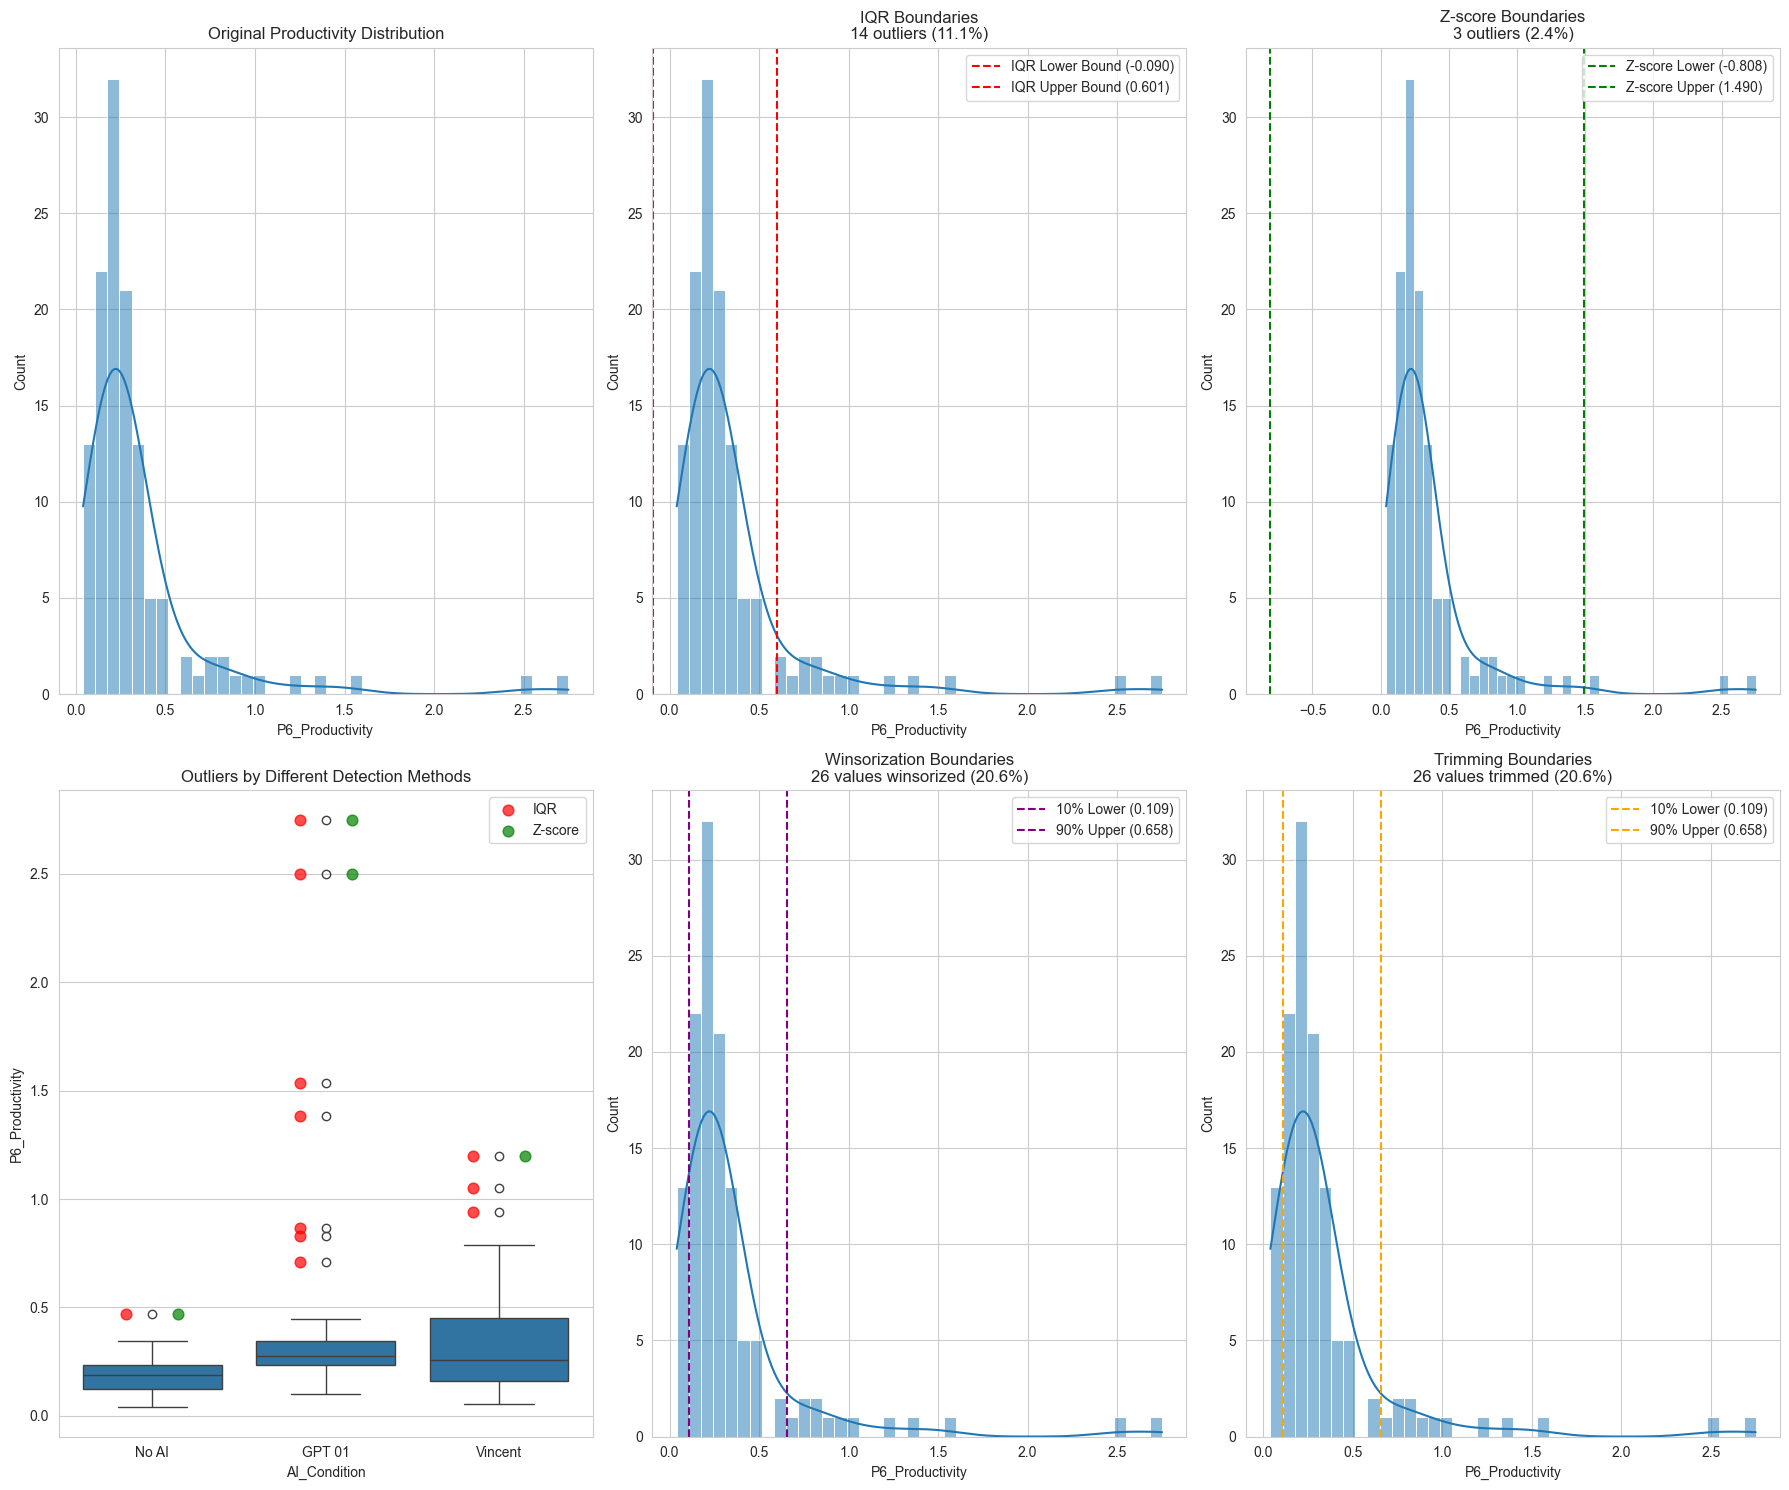

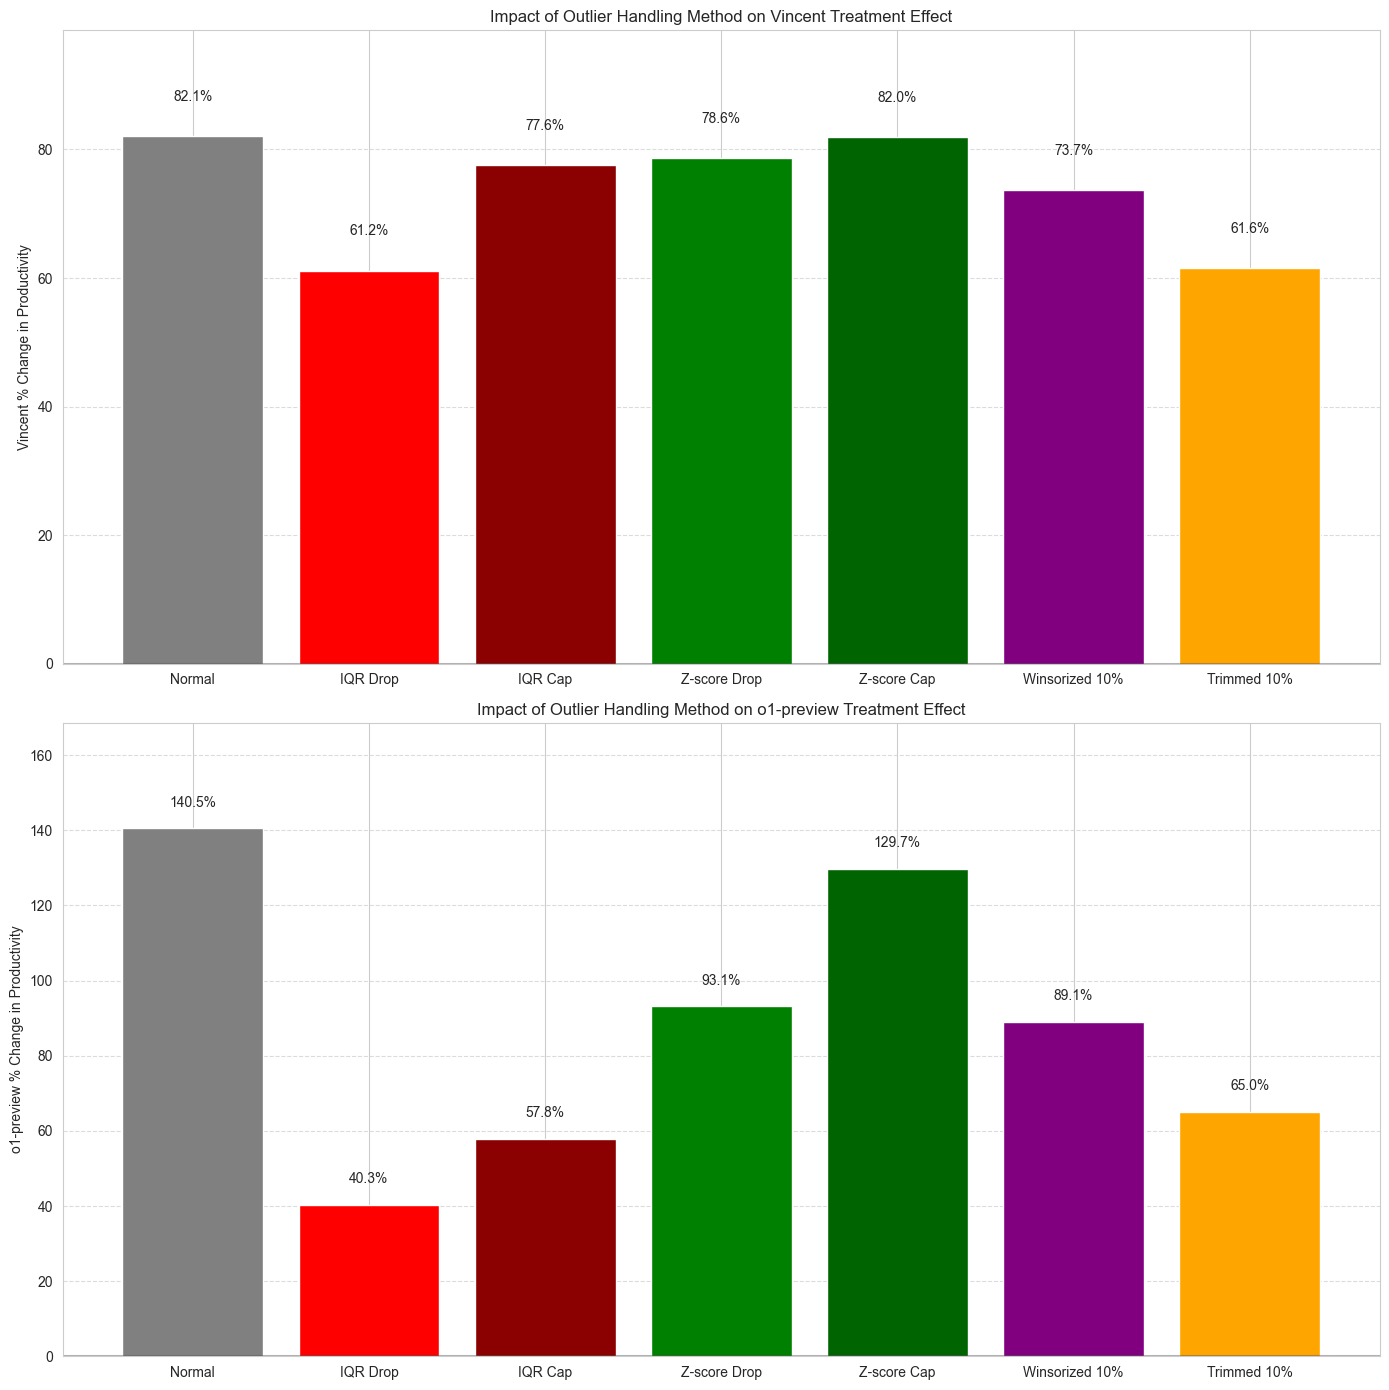

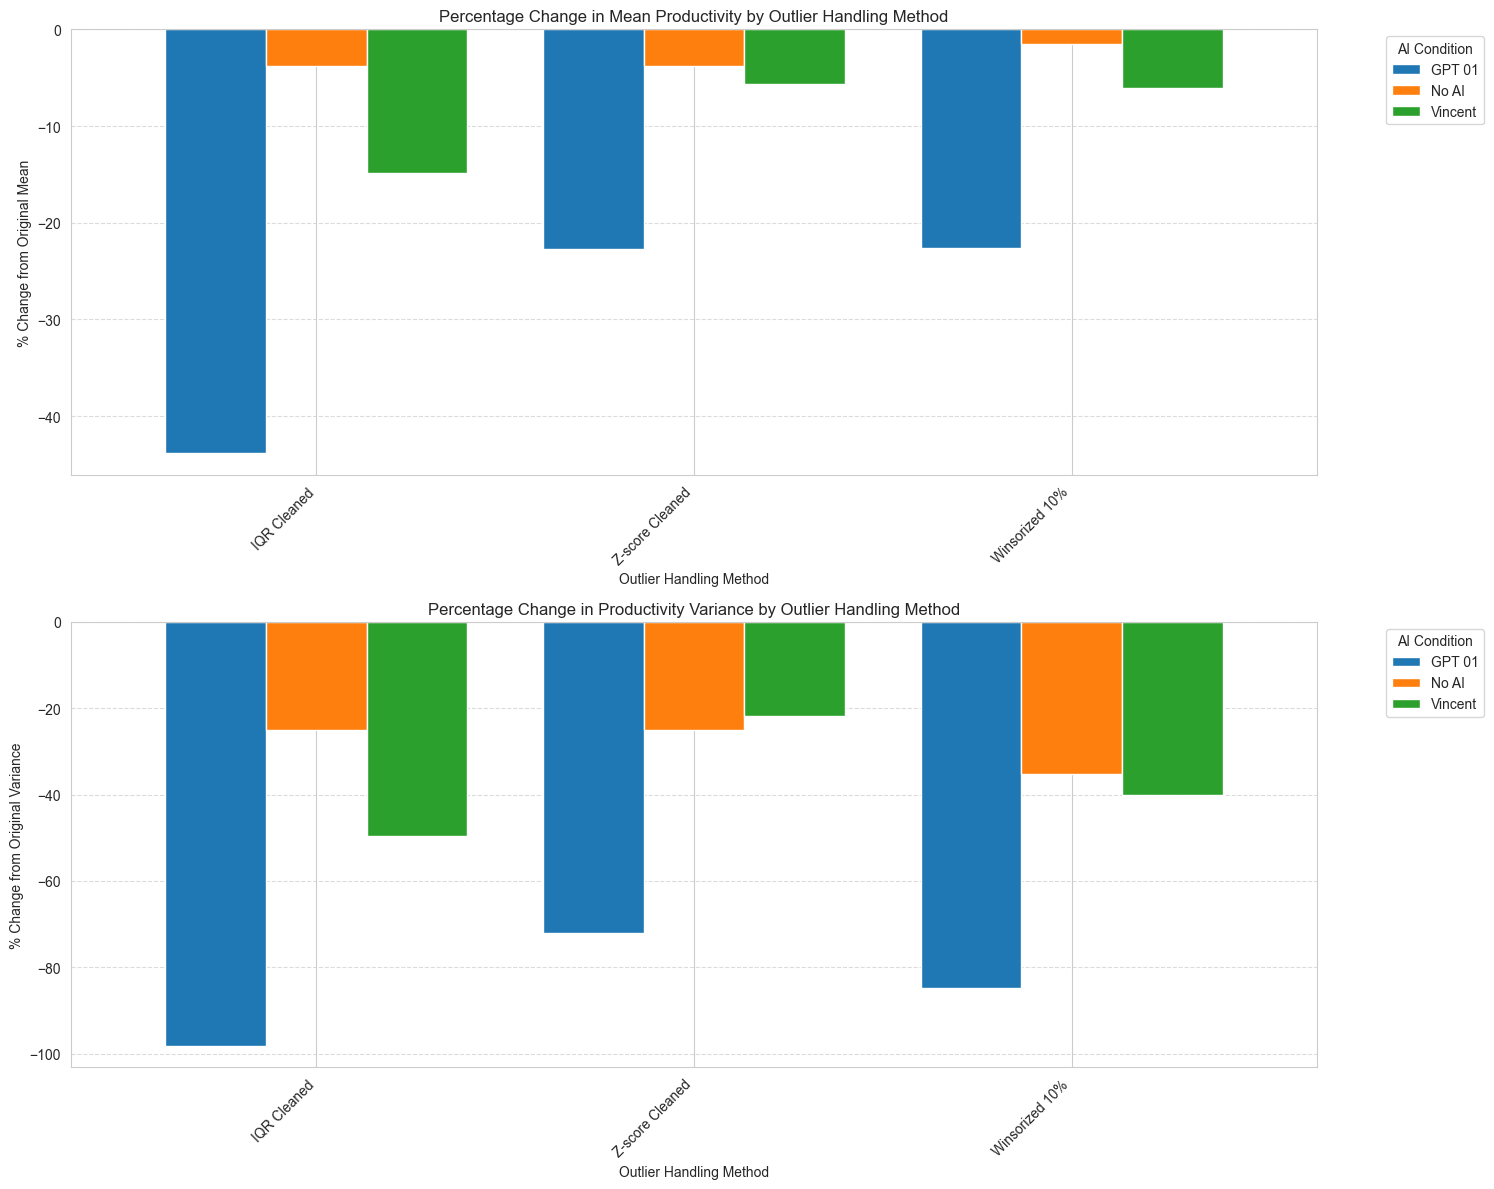

In [ ]:
# IQR method for finding outliers
def iqr_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Z-score method for finding outliers
def zscore_outliers(df, column, threshold=3.0):
    df_subset = df[column].dropna()
    mean = df_subset.mean()
    std = df_subset.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Create IQR-capped data
def iqr_cap_data(df, column):
    """Cap outliers at the IQR boundaries instead of removing them"""
    capped_df = df.copy()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()
    
    # Cap values
    capped_df.loc[capped_df[column] < lower_bound, column] = lower_bound
    capped_df.loc[capped_df[column] > upper_bound, column] = upper_bound
    
    return capped_df, outliers, lower_bound, upper_bound

# Create Z-score-capped data
def zscore_cap_data(df, column, threshold=3.0):
    """Cap outliers at the Z-score boundaries instead of removing them"""
    capped_df = df.copy()
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()
    
    # Cap values
    capped_df.loc[capped_df[column] < lower_bound, column] = lower_bound
    capped_df.loc[capped_df[column] > upper_bound, column] = upper_bound
    
    return capped_df, outliers, lower_bound, upper_bound

# Winsorization function
def winsorize_data(df, column, percentile=0.10):
    """
    Winsorize data by replacing values below the bottom percentile with the value at that percentile,
    and values above the top percentile with the value at that percentile.
    """
    # Make a copy of the dataframe
    winsorized_df = df.copy()
    
    # Calculate the percentiles
    lower_bound = df[column].quantile(percentile)
    upper_bound = df[column].quantile(1 - percentile)
    
    # Identify values outside the bounds
    below_mask = winsorized_df[column] < lower_bound
    above_mask = winsorized_df[column] > upper_bound
    
    # Get outliers for reporting
    outliers = df[below_mask | above_mask].copy()
    
    # Replace values outside the bounds with the bounds
    winsorized_df.loc[below_mask, column] = lower_bound
    winsorized_df.loc[above_mask, column] = upper_bound
    
    return winsorized_df, outliers, lower_bound, upper_bound

# Trimming function
def trim_data(df, column, percentile=0.10):
    """
    Trim data by removing values below the bottom percentile 
    and above the top percentile.
    """
    # Make a copy of the dataframe
    trimmed_df = df.copy()
    
    # Calculate the percentiles
    lower_bound = df[column].quantile(percentile)
    upper_bound = df[column].quantile(1 - percentile)
    
    # Identify values outside the bounds
    outside_bounds = (trimmed_df[column] < lower_bound) | (trimmed_df[column] > upper_bound)
    outliers = trimmed_df[outside_bounds].copy()
    
    # Remove values outside the bounds by setting to NaN
    trimmed_df.loc[outside_bounds, column] = np.nan
    
    return trimmed_df, outliers, lower_bound, upper_bound

# Prepare the regression data
def prepare_regression_data(df):
    regression_df = df.copy()
    regression_df['Vincent_dummy'] = (regression_df['AI_Condition'] == 'Vincent').astype(int)
    regression_df['o1_preview_dummy'] = (regression_df['AI_Condition'] == 'GPT 01').astype(int)
    return regression_df

def run_regression(df, outcome_var):
    reg_df = df.dropna(subset=[outcome_var, 'Vincent_dummy', 'o1_preview_dummy'])
    X = sm.add_constant(reg_df[['Vincent_dummy', 'o1_preview_dummy']])
    y = reg_df[outcome_var]
    model = sm.OLS(y, X)
    results = model.fit(cov_type='HC1')  # Using robust standard errors
    
    # Extract key values
    control_mean = results.params['const']
    vincent_effect = results.params['Vincent_dummy']
    o1_effect = results.params['o1_preview_dummy']
    
    # Calculate percent changes
    vincent_pct = (vincent_effect / control_mean) * 100 if control_mean != 0 else np.nan
    o1_pct = (o1_effect / control_mean) * 100 if control_mean != 0 else np.nan
    
    return {
        'control_mean': control_mean,
        'vincent_effect': vincent_effect,
        'o1_effect': o1_effect,
        'vincent_pct': vincent_pct,
        'o1_pct': o1_pct,
        'vincent_pval': results.pvalues['Vincent_dummy'],
        'o1_pval': results.pvalues['o1_preview_dummy'],
        'n': len(reg_df),
        'r_squared': results.rsquared,
        'adj_r_squared': results.rsquared_adj
    }

# Create visualizations for the distribution and outlier detection methods
def plot_distributions_and_outliers(valid_data):
    # Create a figure to compare distributions and outlier detection methods
    fig, axes = plt.subplots(2, 3, figsize=(18, 15))
    
    # Plot 1: Original Histogram
    sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Original Productivity Distribution')
    
    # Plot 2: Histogram with IQR outlier boundaries
    sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[0, 1])
    iqr_out, iqr_lower, iqr_upper = iqr_outliers(valid_data, 'P6_Productivity')
    axes[0, 1].axvline(x=iqr_lower, color='r', linestyle='--', label=f'IQR Lower Bound ({iqr_lower:.3f})')
    axes[0, 1].axvline(x=iqr_upper, color='r', linestyle='--', label=f'IQR Upper Bound ({iqr_upper:.3f})')
    axes[0, 1].set_title(f'IQR Boundaries\n{len(iqr_out)} outliers ({len(iqr_out)/len(valid_data)*100:.1f}%)')
    axes[0, 1].legend()
    
    # Plot 3: Histogram with Z-score outlier boundaries
    sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[0, 2])
    z_out, z_lower, z_upper = zscore_outliers(valid_data, 'P6_Productivity')
    axes[0, 2].axvline(x=z_lower, color='g', linestyle='--', label=f'Z-score Lower ({z_lower:.3f})')
    axes[0, 2].axvline(x=z_upper, color='g', linestyle='--', label=f'Z-score Upper ({z_upper:.3f})')
    axes[0, 2].set_title(f'Z-score Boundaries\n{len(z_out)} outliers ({len(z_out)/len(valid_data)*100:.1f}%)')
    axes[0, 2].legend()
    
    # Plot 4: Boxplot comparing IQR and Z-score methods
    sns.boxplot(x='AI_Condition', y='P6_Productivity', data=valid_data, ax=axes[1, 0])
    
    # Add outliers from each method with different colors
    for i, group in enumerate(valid_data['AI_Condition'].unique()):
        group_data = valid_data[valid_data['AI_Condition'] == group]
        
        # IQR outliers
        group_iqr_out, _, _ = iqr_outliers(group_data, 'P6_Productivity')
        if not group_iqr_out.empty:
            axes[1, 0].scatter(
                [i-0.15] * len(group_iqr_out), 
                group_iqr_out['P6_Productivity'],
                color='red', s=60, alpha=0.7, label='IQR' if i == 0 else ""
            )
        
        # Z-score outliers
        group_z_out, _, _ = zscore_outliers(group_data, 'P6_Productivity')
        if not group_z_out.empty:
            axes[1, 0].scatter(
                [i+0.15] * len(group_z_out), 
                group_z_out['P6_Productivity'],
                color='green', s=60, alpha=0.7, label='Z-score' if i == 0 else ""
            )
    
    axes[1, 0].set_title('Outliers by Different Detection Methods')
    axes[1, 0].legend()
    
    # Plot 5: Histogram with 10% Winsorization boundaries
    sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[1, 1])
    winsorized_df, wins_out, wins_lower, wins_upper = winsorize_data(valid_data, 'P6_Productivity', 0.10)
    axes[1, 1].axvline(x=wins_lower, color='purple', linestyle='--', label=f'10% Lower ({wins_lower:.3f})')
    axes[1, 1].axvline(x=wins_upper, color='purple', linestyle='--', label=f'90% Upper ({wins_upper:.3f})')
    axes[1, 1].set_title(f'Winsorization Boundaries\n{len(wins_out)} values winsorized ({len(wins_out)/len(valid_data)*100:.1f}%)')
    axes[1, 1].legend()
    
    # Plot 6: Histogram with 10% Trimming boundaries
    sns.histplot(valid_data['P6_Productivity'], kde=True, ax=axes[1, 2])
    trimmed_df, trim_out, trim_lower, trim_upper = trim_data(valid_data, 'P6_Productivity', 0.10)
    axes[1, 2].axvline(x=trim_lower, color='orange', linestyle='--', label=f'10% Lower ({trim_lower:.3f})')
    axes[1, 2].axvline(x=trim_upper, color='orange', linestyle='--', label=f'90% Upper ({trim_upper:.3f})')
    axes[1, 2].set_title(f'Trimming Boundaries\n{len(trim_out)} values trimmed ({len(trim_out)/len(valid_data)*100:.1f}%)')
    axes[1, 2].legend()
    
    
    plt.tight_layout()
    return plt.gcf()

# Execute main analysis
def main_analysis(valid_data):
    # Prepare the regression data
    regression_data = prepare_regression_data(valid_data)
    
    # 1. Run regression with all data (normal)
    full_results = run_regression(regression_data, 'P6_Productivity')
    
    # 2. IQR with dropping outliers
    iqr_drop_data = regression_data.copy()
    for group in iqr_drop_data['AI_Condition'].unique():
        group_data = iqr_drop_data[iqr_drop_data['AI_Condition'] == group]
        group_outliers, lower, upper = iqr_outliers(group_data, 'P6_Productivity')
        if not group_outliers.empty:
            for idx in group_outliers.index:
                iqr_drop_data.loc[idx, 'P6_Productivity'] = np.nan
    iqr_drop_results = run_regression(iqr_drop_data, 'P6_Productivity')
    
    # 3. IQR with capping outliers
    iqr_cap_results = {}
    iqr_capped_data = regression_data.copy()
    for group in regression_data['AI_Condition'].unique():
        group_data = regression_data[regression_data['AI_Condition'] == group]
        group_capped, _, _, _ = iqr_cap_data(group_data, 'P6_Productivity')
        iqr_capped_data.loc[group_data.index, 'P6_Productivity'] = group_capped['P6_Productivity'].values
    iqr_cap_results = run_regression(iqr_capped_data, 'P6_Productivity')
    
    # 4. Z-score with dropping outliers
    z_drop_data = regression_data.copy()
    for group in z_drop_data['AI_Condition'].unique():
        group_data = z_drop_data[z_drop_data['AI_Condition'] == group]
        group_outliers, lower, upper = zscore_outliers(group_data, 'P6_Productivity')
        if not group_outliers.empty:
            for idx in group_outliers.index:
                z_drop_data.loc[idx, 'P6_Productivity'] = np.nan
    z_drop_results = run_regression(z_drop_data, 'P6_Productivity')
    
    # 5. Z-score with capping outliers
    z_capped_data = regression_data.copy()
    for group in regression_data['AI_Condition'].unique():
        group_data = regression_data[regression_data['AI_Condition'] == group]
        group_capped, _, _, _ = zscore_cap_data(group_data, 'P6_Productivity')
        z_capped_data.loc[group_data.index, 'P6_Productivity'] = group_capped['P6_Productivity'].values
    z_cap_results = run_regression(z_capped_data, 'P6_Productivity')
    
    # 6. Use Winsorized data for regression
    winsorized_reg_data = regression_data.copy()
    for group in winsorized_reg_data['AI_Condition'].unique():
        group_data = winsorized_reg_data[winsorized_reg_data['AI_Condition'] == group]
        group_winsorized, _, _, _ = winsorize_data(group_data, 'P6_Productivity', 0.10)
        winsorized_reg_data.loc[group_data.index, 'P6_Productivity'] = group_winsorized['P6_Productivity'].values
    winsorized_results = run_regression(winsorized_reg_data, 'P6_Productivity')
    
    # 7. Use Trimmed data for regression
    trimmed_reg_data = regression_data.copy()
    for group in trimmed_reg_data['AI_Condition'].unique():
        group_data = trimmed_reg_data[trimmed_reg_data['AI_Condition'] == group]
        group_trimmed, _, _, _ = trim_data(group_data, 'P6_Productivity', 0.10)
        trimmed_reg_data.loc[group_data.index, 'P6_Productivity'] = group_trimmed['P6_Productivity'].values
    trimmed_results = run_regression(trimmed_reg_data, 'P6_Productivity')
    
    # Create a detailed comparison table
    print("Comparison of Regression Results by Outlier Handling Method")
    print("=" * 120)
    print(f"{'Method':<15} {'Control Mean':<15} {'Vincent Effect':<15} {'Vincent % Change':<15} {'Vincent p-val':<15} {'o1 Effect':<15} {'o1 % Change':<15} {'o1 p-val':<15} {'R²':<10} {'N':<8}")
    print("-" * 120)
    
    methods = ['Normal', 'IQR Drop', 'IQR Cap', 'Z-score Drop', 'Z-score Cap', 'Winsorized 10%', 'Trimmed 10%']
    results_list = [full_results, iqr_drop_results, iqr_cap_results, z_drop_results, z_cap_results, winsorized_results, trimmed_results]
    
    for method, results in zip(methods, results_list):
        print(f"{method:<15} {results['control_mean']:<15.4f} {results['vincent_effect']:<15.4f} {results['vincent_pct']:<15.1f} {results['vincent_pval']:<15.4f} {results['o1_effect']:<15.4f} {results['o1_pct']:<15.1f} {results['o1_pval']:<15.4f} {results['r_squared']:<10.4f} {results['n']:<8}")
    
    # Return the results for visualization
    return methods, results_list

# Plot the regression results
def plot_regression_results(methods, results_list):
    
    # Extract percent changes for each method
    vincent_changes = [results['vincent_pct'] for results in results_list]
    o1_changes = [results['o1_pct'] for results in results_list]
    
    # Determine y-axis limits (+20% buffer for the max, min stays the same)
    vincent_max = max(vincent_changes) * 1.2
    vincent_min = 0 #min(vincent_changes)
    
    o1_max = max(o1_changes) * 1.2
    o1_min = 0 # min(o1_changes)
    
    # Create a figure for comparing treatment effects
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
    fig.subplots_adjust(hspace=0.4)

    # Plot Vincent effects
    bars1 = ax1.bar(methods, vincent_changes, color=['gray', 'red', 'darkred', 'green', 'darkgreen', 'purple', 'orange'])
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_ylabel('Vincent % Change in Productivity')
    ax1.set_title('Impact of Outlier Handling Method on Vincent Treatment Effect')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.set_ylim(vincent_min, vincent_max)  # Keep min, expand max

    # Add value labels on the bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + (5 if height > 0 else -5), 
                 f'{height:.1f}%', ha='center', va=('bottom' if height > 0 else 'top'))

    # Plot o1 effects
    bars2 = ax2.bar(methods, o1_changes, color=['gray', 'red', 'darkred', 'green', 'darkgreen', 'purple', 'orange'])
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.set_ylabel('o1-preview % Change in Productivity')
    ax2.set_title('Impact of Outlier Handling Method on o1-preview Treatment Effect')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.set_ylim(o1_min, o1_max)  # Keep min, expand max

    # Add value labels on the bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + (5 if height > 0 else -5), 
                 f'{height:.1f}%', ha='center', va=('bottom' if height > 0 else 'top'))

    plt.tight_layout()
    return plt.gcf()



# Compare means and variances across methods
def compare_means_and_variances(valid_data, regression_data):
    # Create dataframes for analysis
    iqr_drop_data = regression_data.copy()
    for group in iqr_drop_data['AI_Condition'].unique():
        group_data = iqr_drop_data[iqr_drop_data['AI_Condition'] == group]
        group_outliers, lower, upper = iqr_outliers(group_data, 'P6_Productivity')
        if not group_outliers.empty:
            for idx in group_outliers.index:
                iqr_drop_data.loc[idx, 'P6_Productivity'] = np.nan
    
    iqr_capped_data = regression_data.copy()
    for group in regression_data['AI_Condition'].unique():
        group_data = regression_data[regression_data['AI_Condition'] == group]
        group_capped, _, _, _ = iqr_cap_data(group_data, 'P6_Productivity')
        iqr_capped_data.loc[group_data.index, 'P6_Productivity'] = group_capped['P6_Productivity'].values
    
    z_drop_data = regression_data.copy()
    for group in z_drop_data['AI_Condition'].unique():
        group_data = z_drop_data[z_drop_data['AI_Condition'] == group]
        group_outliers, lower, upper = zscore_outliers(group_data, 'P6_Productivity')
        if not group_outliers.empty:
            for idx in group_outliers.index:
                z_drop_data.loc[idx, 'P6_Productivity'] = np.nan
    
    z_capped_data = regression_data.copy()
    for group in regression_data['AI_Condition'].unique():
        group_data = regression_data[regression_data['AI_Condition'] == group]
        group_capped, _, _, _ = zscore_cap_data(group_data, 'P6_Productivity')
        z_capped_data.loc[group_data.index, 'P6_Productivity'] = group_capped['P6_Productivity'].values
    
    winsorized_reg_data = regression_data.copy()
    for group in winsorized_reg_data['AI_Condition'].unique():
        group_data = winsorized_reg_data[winsorized_reg_data['AI_Condition'] == group]
        group_winsorized, _, _, _ = winsorize_data(group_data, 'P6_Productivity', 0.10)
        winsorized_reg_data.loc[group_data.index, 'P6_Productivity'] = group_winsorized['P6_Productivity'].values
    
    trimmed_reg_data = regression_data.copy()
    for group in trimmed_reg_data['AI_Condition'].unique():
        group_data = trimmed_reg_data[trimmed_reg_data['AI_Condition'] == group]
        group_trimmed, _, _, _ = trim_data(group_data, 'P6_Productivity', 0.10)
        trimmed_reg_data.loc[group_data.index, 'P6_Productivity'] = group_trimmed['P6_Productivity'].values
    
    # Get means for each method
    original_grouped = valid_data.groupby('AI_Condition')['P6_Productivity'].mean()
    iqr_drop_grouped = iqr_drop_data.groupby('AI_Condition')['P6_Productivity'].mean()
    iqr_cap_grouped = iqr_capped_data.groupby('AI_Condition')['P6_Productivity'].mean()
    z_drop_grouped = z_drop_data.groupby('AI_Condition')['P6_Productivity'].mean()
    z_cap_grouped = z_capped_data.groupby('AI_Condition')['P6_Productivity'].mean()
    winsorized_grouped = winsorized_reg_data.groupby('AI_Condition')['P6_Productivity'].mean()
    trimmed_grouped = trimmed_reg_data.groupby('AI_Condition')['P6_Productivity'].mean()
    
    # Create a table summarizing the changes in mean values by condition
    method_labels = ['Normal', 'IQR Drop', 'IQR Cap', 'Z-score Drop', 'Z-score Cap', 'Winsorized 10%', 'Trimmed 10%']
    summary_table = pd.DataFrame({
        'Normal': original_grouped,
        'IQR Drop': iqr_drop_grouped,
        'IQR Cap': iqr_cap_grouped,
        'Z-score Drop': z_drop_grouped,
        'Z-score Cap': z_cap_grouped,
        'Winsorized 10%': winsorized_grouped,
        'Trimmed 10%': trimmed_grouped
    })
    
    # Calculate percentage changes from original
    for method in summary_table.columns[1:]:
        summary_table[f'{method} % Change'] = (summary_table[method] / summary_table['Normal'] - 1) * 100
    
    print("\nSummary of Mean Productivity by Condition and Method:")
    print(summary_table.round(4))
    
    # Also analyze variance reduction
    var_summary = pd.DataFrame({
        'Normal': valid_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'IQR Drop': iqr_drop_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'IQR Cap': iqr_capped_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'Z-score Drop': z_drop_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'Z-score Cap': z_capped_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'Winsorized 10%': winsorized_reg_data.groupby('AI_Condition')['P6_Productivity'].var(),
        'Trimmed 10%': trimmed_reg_data.groupby('AI_Condition')['P6_Productivity'].var()
    })
    
    # Calculate percentage changes in variance
    for method in var_summary.columns[1:]:
        var_summary[f'{method} % Change'] = (var_summary[method] / var_summary['Normal'] - 1) * 100
    
    print("\nSummary of Productivity Variance by Condition and Method:")
    print(var_summary.round(4))

# Visualization of mean and variance changes
def plot_mean_variance_changes(summary_table, var_summary):
    # Prepare data for plotting
    conditions = summary_table.index
    methods = summary_table.columns[1:-3]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot mean percentage changes
    mean_changes = summary_table[[f'{method} % Change' for method in methods]].T
    
    # First subplot for mean changes
    mean_changes.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title('Percentage Change in Mean Productivity by Outlier Handling Method')
    ax1.set_xlabel('Outlier Handling Method')
    ax1.set_ylabel('% Change from Original Mean')
    ax1.legend(title='AI Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    ax1.set_xticklabels([method.replace(' % Change', '') for method in mean_changes.index], rotation=45, ha='right')
    
    # Plot variance percentage changes
    var_changes = var_summary[[f'{method} % Change' for method in methods]].T
    
    # Second subplot for variance changes
    var_changes.plot(kind='bar', ax=ax2, width=0.8)
    ax2.set_title('Percentage Change in Productivity Variance by Outlier Handling Method')
    ax2.set_xlabel('Outlier Handling Method')
    ax2.set_ylabel('% Change from Original Variance')
    ax2.legend(title='AI Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    ax2.set_xticklabels([method.replace(' % Change', '') for method in var_changes.index], rotation=45, ha='right')
    
    plt.tight_layout()
    return plt.gcf()

# Example usage in main function
def main():
    # Load your data (replace this with actual data loading)
    # valid_data = pd.read_csv('your_data.csv')
    
    # Visualize distributions and outliers
    distribution_fig = plot_distributions_and_outliers(valid_data)
    #distribution_fig.savefig('outlier_distributions.png')
    
    # Run main analysis
    methods, results_list = main_analysis(valid_data)
    
    # Plot regression results
    regression_results_fig = plot_regression_results(methods, results_list)
    #regression_results_fig.savefig('regression_results.png')
    
    # Compare means and variances
    regression_data = prepare_regression_data(valid_data)
    compare_means_and_variances(valid_data, regression_data)
    
    # Plot mean and variance changes
    mean_variance_fig = plot_mean_variance_changes(summary_table, var_summary)
    #mean_variance_fig.savefig('mean_variance_changes.png')

if __name__ == '__main__':
    main()


ANALYSIS REPORT: COMPARING DROPPING VS CAPPING TOP 4 MOST PRODUCTIVE OBSERVATIONS

HANDLED OBSERVATIONS:
----------------------------------------------------------------------------------------------------
Observation 1:
  Index: 92
  AI Condition: GPT 01
  Original Productivity: 2.7500
  When capped: 1.2000
Observation 2:
  Index: 86
  AI Condition: GPT 01
  Original Productivity: 2.5000
  When capped: 1.2000
Observation 3:
  Index: 36
  AI Condition: GPT 01
  Original Productivity: 1.5333
  When capped: 1.2000
Observation 4:
  Index: 110
  AI Condition: GPT 01
  Original Productivity: 1.3810
  When capped: 1.2000

Cap value (5th highest productivity): 1.2000

COUNT OF HANDLED OBSERVATIONS BY CONDITION:
----------------------------------------------------------------------------------------------------
  GPT 01: 4

REGRESSION RESULTS COMPARISON:
----------------------------------------------------------------------------------------------------
Metric               Original        Dr

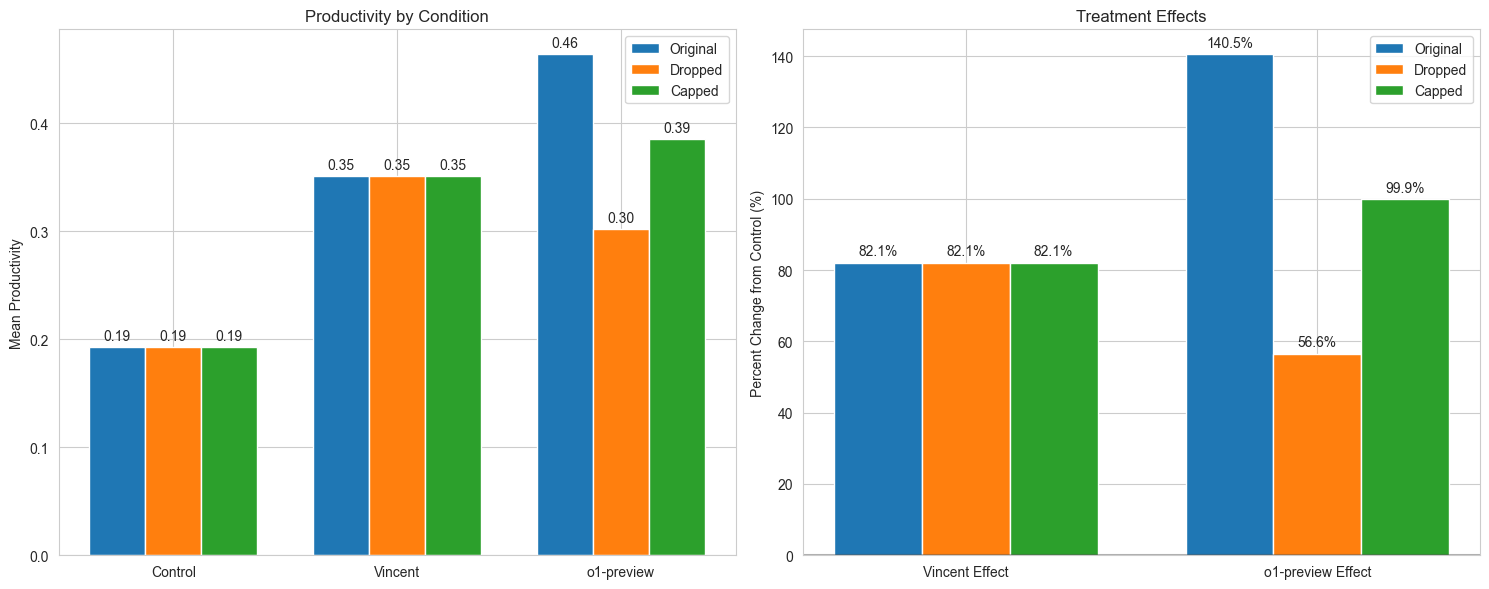

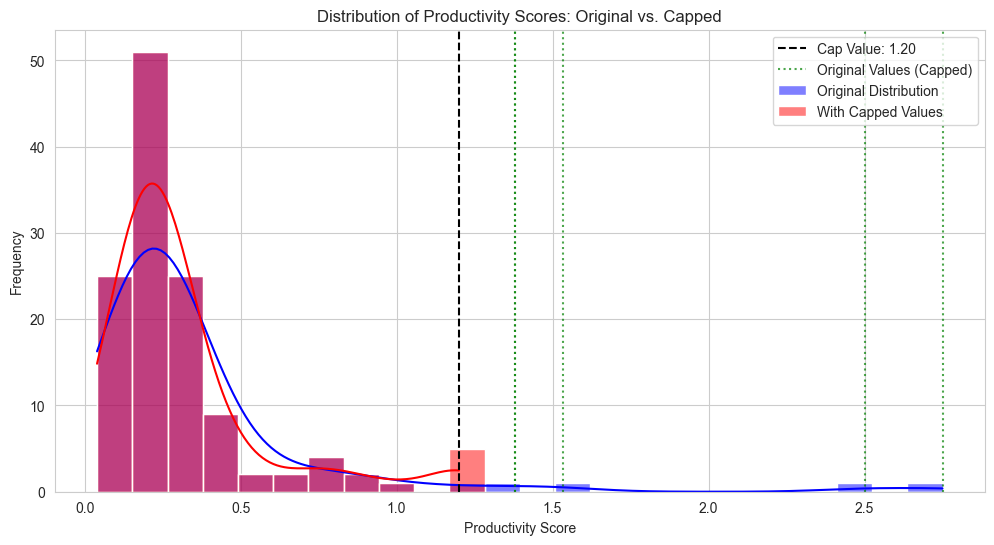

In [ ]:
def analyze_drop_vs_cap(n_to_handle=4):
    """
    Analyze the effect of dropping vs capping the top n most productive observations
    
    Parameters:
    n_to_handle (int): Number of top observations to handle
    
    Returns:
    tuple: (original_results, dropped_results, capped_results, handled_data, cap_value)
    """
    # Make a copy of the dataframe
    data = valid_data.copy()
    
    # Prepare for regression
    regression_data = prepare_regression_data(data)
    
    # Run regression with all data
    original_results = run_regression(regression_data, 'P6_Productivity')
    
    # Identify top n most productive observations
    top_data = data.nlargest(n_to_handle, 'P6_Productivity')
    top_indices = top_data.index
    
    # Get the cap value (value of the n+1 highest observation)
    cap_value = data.nlargest(n_to_handle + 1, 'P6_Productivity').iloc[-1]['P6_Productivity']
    
    # Create a dataframe with the handled observations for reporting
    handled_data = data.loc[top_indices].copy()
    
    # METHOD 1: Create a modified dataframe without these observations (dropping)
    dropped_data = data.drop(top_indices)
    dropped_regression_data = prepare_regression_data(dropped_data)
    
    # Run regression with dropped data
    dropped_results = run_regression(dropped_regression_data, 'P6_Productivity')
    
    # METHOD 2: Create a modified dataframe with capped values
    capped_data = data.copy()
    capped_data.loc[top_indices, 'P6_Productivity'] = cap_value
    capped_regression_data = prepare_regression_data(capped_data)
    
    # Run regression with capped data
    capped_results = run_regression(capped_regression_data, 'P6_Productivity')
    
    return original_results, dropped_results, capped_results, handled_data, cap_value

def plot_comparison(original_results, dropped_results, capped_results):
    """Plot a comparison of results with different outlier handling methods"""
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Data for plotting
    conditions = ['Control', 'Vincent', 'o1-preview']
    original_values = [
        original_results['control_mean'],
        original_results['control_mean'] + original_results['vincent_effect'],
        original_results['control_mean'] + original_results['o1_effect']
    ]
    dropped_values = [
        dropped_results['control_mean'],
        dropped_results['control_mean'] + dropped_results['vincent_effect'],
        dropped_results['control_mean'] + dropped_results['o1_effect']
    ]
    capped_values = [
        capped_results['control_mean'],
        capped_results['control_mean'] + capped_results['vincent_effect'],
        capped_results['control_mean'] + capped_results['o1_effect']
    ]
    
    x = np.arange(len(conditions))
    width = 0.25
    
    # Plot mean productivity by condition
    rects1 = ax1.bar(x - width, original_values, width, label='Original')
    rects2 = ax1.bar(x, dropped_values, width, label='Dropped')
    rects3 = ax1.bar(x + width, capped_values, width, label='Capped')
    
    ax1.set_ylabel('Mean Productivity')
    ax1.set_title('Productivity by Condition')
    ax1.set_xticks(x)
    ax1.set_xticklabels(conditions)
    ax1.legend()
    
    # Add value labels on bars
    for rect in rects1:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    for rect in rects2:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
    for rect in rects3:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Plot percentage effects
    percent_data = {
        'Vincent Effect': [
            original_results['vincent_pct'], 
            dropped_results['vincent_pct'], 
            capped_results['vincent_pct']
        ],
        'o1-preview Effect': [
            original_results['o1_pct'], 
            dropped_results['o1_pct'], 
            capped_results['o1_pct']
        ]
    }
    
    x2 = np.arange(len(percent_data))
    
    # Plot the percent changes
    ax2.bar(x2 - width, [percent_data['Vincent Effect'][0], percent_data['o1-preview Effect'][0]], 
            width, label='Original')
    ax2.bar(x2, [percent_data['Vincent Effect'][1], percent_data['o1-preview Effect'][1]], 
            width, label='Dropped')
    ax2.bar(x2 + width, [percent_data['Vincent Effect'][2], percent_data['o1-preview Effect'][2]], 
            width, label='Capped')
    
    ax2.set_ylabel('Percent Change from Control (%)')
    ax2.set_title('Treatment Effects')
    ax2.set_xticks(x2)
    ax2.set_xticklabels(['Vincent Effect', 'o1-preview Effect'])
    ax2.legend()
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Add value labels
    for i, effect_type in enumerate(['Vincent Effect', 'o1-preview Effect']):
        for j, (method, offset) in enumerate([('Original', -width), ('Dropped', 0), ('Capped', width)]):
            height = percent_data[effect_type][j]
            ax2.annotate(f'{height:.1f}%',
                        xy=(i + offset, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom' if height > 0 else 'top')
    
    plt.tight_layout()
    return fig

def print_report(original_results, dropped_results, capped_results, handled_data, cap_value):
    """Print a detailed report of the analysis"""
    print("\n" + "="*100)
    print("ANALYSIS REPORT: COMPARING DROPPING VS CAPPING TOP 4 MOST PRODUCTIVE OBSERVATIONS")
    print("="*100)
    
    print("\nHANDLED OBSERVATIONS:")
    print("-"*100)
    for i, (idx, row) in enumerate(handled_data.iterrows(), 1):
        print(f"Observation {i}:")
        print(f"  Index: {idx}")
        print(f"  AI Condition: {row['AI_Condition']}")
        print(f"  Original Productivity: {row['P6_Productivity']:.4f}")
        print(f"  When capped: {cap_value:.4f}")
    
    print(f"\nCap value (5th highest productivity): {cap_value:.4f}")
    
    print("\nCOUNT OF HANDLED OBSERVATIONS BY CONDITION:")
    print("-"*100)
    condition_counts = handled_data['AI_Condition'].value_counts()
    for condition in handled_data['AI_Condition'].unique():
        count = condition_counts.get(condition, 0)
        print(f"  {condition}: {count}")
    
    print("\nREGRESSION RESULTS COMPARISON:")
    print("-"*100)
    print(f"{'Metric':<20} {'Original':<15} {'Dropped':<15} {'Capped':<15}")
    print("-"*100)
    
    metrics = [
        ('Control Mean', 'control_mean'),
        ('Vincent Effect', 'vincent_effect'),
        ('Vincent % Change', 'vincent_pct'),
        ('Vincent p-value', 'vincent_pval'),
        ('o1 Effect', 'o1_effect'),
        ('o1 % Change', 'o1_pct'),
        ('o1 p-value', 'o1_pval'),
        ('R²', 'r_squared'),
        ('N', 'n')
    ]
    
    for label, key in metrics:
        orig = original_results[key]
        drop = dropped_results[key]
        cap = capped_results[key]
        
        # Format values based on the metric type
        if 'pval' in key:
            orig_str = f"{orig:.4f}"
            drop_str = f"{drop:.4f}"
            cap_str = f"{cap:.4f}"
        elif key == 'n':
            orig_str = f"{int(orig)}"
            drop_str = f"{int(drop)}"
            cap_str = f"{int(cap)}"
        elif 'pct' in key:
            orig_str = f"{orig:.1f}%"
            drop_str = f"{drop:.1f}%"
            cap_str = f"{cap:.1f}%"
        else:
            orig_str = f"{orig:.4f}"
            drop_str = f"{drop:.4f}"
            cap_str = f"{cap:.4f}"
        
        print(f"{label:<20} {orig_str:<15} {drop_str:<15} {cap_str:<15}")
    
    print("\nCHANGES FROM ORIGINAL:")
    print("-"*100)
    print(f"{'Metric':<20} {'Dropped Change':<15} {'Dropped % Diff':<15} {'Capped Change':<15} {'Capped % Diff':<15}")
    print("-"*100)
    
    for label, key in metrics:
        orig = original_results[key]
        drop = dropped_results[key]
        cap = capped_results[key]
        
        # Calculate absolute and percent changes
        drop_change = drop - orig
        cap_change = cap - orig
        
        if orig != 0:
            drop_pct_diff = (drop_change / orig) * 100
            cap_pct_diff = (cap_change / orig) * 100
        else:
            drop_pct_diff = float('nan')
            cap_pct_diff = float('nan')
        
        # Format values based on the metric type
        if 'pval' in key:
            drop_change_str = f"{drop_change:.4f}"
            cap_change_str = f"{cap_change:.4f}"
        elif key == 'n':
            drop_change_str = f"{int(drop_change)}"
            cap_change_str = f"{int(cap_change)}"
        elif 'pct' in key:
            drop_change_str = f"{drop_change:.1f}%"
            cap_change_str = f"{cap_change:.1f}%"
        else:
            drop_change_str = f"{drop_change:.4f}"
            cap_change_str = f"{cap_change:.4f}"
        
        drop_pct_diff_str = f"{drop_pct_diff:.1f}%" if not pd.isna(drop_pct_diff) else "N/A"
        cap_pct_diff_str = f"{cap_pct_diff:.1f}%" if not pd.isna(cap_pct_diff) else "N/A"
        
        print(f"{label:<20} {drop_change_str:<15} {drop_pct_diff_str:<15} {cap_change_str:<15} {cap_pct_diff_str:<15}")
    
    
    print("\nINTERPRETATION:")
    print("-"*100)
    
    # Check significance changes
    vincent_drop_sig_change = (original_results['vincent_pval'] < 0.05) != (dropped_results['vincent_pval'] < 0.05)
    vincent_cap_sig_change = (original_results['vincent_pval'] < 0.05) != (capped_results['vincent_pval'] < 0.05)
    o1_drop_sig_change = (original_results['o1_pval'] < 0.05) != (dropped_results['o1_pval'] < 0.05)
    o1_cap_sig_change = (original_results['o1_pval'] < 0.05) != (capped_results['o1_pval'] < 0.05)
    
    print("Statistical Significance Changes:")
    
    if vincent_drop_sig_change:
        original_sig = "significant" if original_results['vincent_pval'] < 0.05 else "not significant"
        drop_sig = "significant" if dropped_results['vincent_pval'] < 0.05 else "not significant"
        print(f"- The Vincent effect changed from {original_sig} to {drop_sig} when dropping top observations.")
    
    if vincent_cap_sig_change:
        original_sig = "significant" if original_results['vincent_pval'] < 0.05 else "not significant"
        cap_sig = "significant" if capped_results['vincent_pval'] < 0.05 else "not significant"
        print(f"- The Vincent effect changed from {original_sig} to {cap_sig} when capping top observations.")
    
    if o1_drop_sig_change:
        original_sig = "significant" if original_results['o1_pval'] < 0.05 else "not significant"
        drop_sig = "significant" if dropped_results['o1_pval'] < 0.05 else "not significant"
        print(f"- The o1-preview effect changed from {original_sig} to {drop_sig} when dropping top observations.")
    
    if o1_cap_sig_change:
        original_sig = "significant" if original_results['o1_pval'] < 0.05 else "not significant"
        cap_sig = "significant" if capped_results['o1_pval'] < 0.05 else "not significant"
        print(f"- The o1-preview effect changed from {original_sig} to {cap_sig} when capping top observations.")
    
    if not any([vincent_drop_sig_change, vincent_cap_sig_change, o1_drop_sig_change, o1_cap_sig_change]):
        print("- No changes in statistical significance observed with either method.")
    
    # Check for substantial effect size changes
    print("\nEffect Size Changes:")
    
    vincent_drop_effect_change = (dropped_results['vincent_pct'] - original_results['vincent_pct'])
    vincent_cap_effect_change = (capped_results['vincent_pct'] - original_results['vincent_pct'])
    o1_drop_effect_change = (dropped_results['o1_pct'] - original_results['o1_pct'])
    o1_cap_effect_change = (capped_results['o1_pct'] - original_results['o1_pct'])
    
    print(f"- Vincent effect changed by {vincent_drop_effect_change:.1f} percentage points when dropping outliers.")
    print(f"- Vincent effect changed by {vincent_cap_effect_change:.1f} percentage points when capping outliers.")
    print(f"- o1-preview effect changed by {o1_drop_effect_change:.1f} percentage points when dropping outliers.")
    print(f"- o1-preview effect changed by {o1_cap_effect_change:.1f} percentage points when capping outliers.")
    
    # Compare the methods
    print("\nComparison of Methods:")
    
    # For Vincent effect
    if abs(vincent_drop_effect_change) > abs(vincent_cap_effect_change):
        print(f"- Dropping had a larger impact on the Vincent effect than capping.")
    elif abs(vincent_drop_effect_change) < abs(vincent_cap_effect_change):
        print(f"- Capping had a larger impact on the Vincent effect than dropping.")
    else:
        print(f"- Both methods had similar impacts on the Vincent effect.")
    
    # For o1 effect
    if abs(o1_drop_effect_change) > abs(o1_cap_effect_change):
        print(f"- Dropping had a larger impact on the o1-preview effect than capping.")
    elif abs(o1_drop_effect_change) < abs(o1_cap_effect_change):
        print(f"- Capping had a larger impact on the o1-preview effect than dropping.")
    else:
        print(f"- Both methods had similar impacts on the o1-preview effect.")
    
    # Sample size considerations
    print(f"\n- Dropping reduced the sample size by {int(original_results['n'] - dropped_results['n'])} observations.")
    print(f"- Capping preserved all {int(original_results['n'])} observations but limited their maximum value.")

# Create a distribution plot to see the effect of capping
def plot_distribution_comparison(handled_data, cap_value):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get all productivity values
    all_productivity = valid_data['P6_Productivity']
    
    # Create bins for the histogram
    bins = np.linspace(all_productivity.min(), all_productivity.max(), 25)
    
    # Plot original distribution
    sns.histplot(all_productivity, bins=bins, kde=True, alpha=0.5, 
                 label='Original Distribution', color='blue', ax=ax)
    
    # Create a modified distribution with capped values
    capped_productivity = all_productivity.copy()
    capped_productivity.loc[handled_data.index] = cap_value
    
    # Plot capped distribution
    sns.histplot(capped_productivity, bins=bins, kde=True, alpha=0.5, 
                 label='With Capped Values', color='red', ax=ax)
    
    # Add a vertical line for the cap value
    ax.axvline(x=cap_value, color='black', linestyle='--', 
               label=f'Cap Value: {cap_value:.2f}')
    
    # Mark the original values that were capped
    for val in handled_data['P6_Productivity']:
        ax.axvline(x=val, color='green', linestyle=':', alpha=0.7)
    
    # Add a line for the first capped value with a label
    if not handled_data.empty:
        ax.axvline(x=handled_data['P6_Productivity'].min(), color='green', 
                   linestyle=':', alpha=0.7, label='Original Values (Capped)')
    
    ax.set_title('Distribution of Productivity Scores: Original vs. Capped')
    ax.set_xlabel('Productivity Score')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    return fig

# Run the analysis
original_results, dropped_results, capped_results, handled_data, cap_value = analyze_drop_vs_cap(n_to_handle=4)

# Print the report
print_report(original_results, dropped_results, capped_results, handled_data, cap_value)

# Create and display the comparison plots
fig1 = plot_comparison(original_results, dropped_results, capped_results)
plt.figure(fig1.number)
plt.show()

# Plot distribution comparison
fig2 = plot_distribution_comparison(handled_data, cap_value)
plt.figure(fig2.number)
plt.show()

Normality Test Results for Productivity Data

Overall Dataset:
----------------------------------------
Shapiro test: statistic=0.5567, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Dagostino test: statistic=138.4099, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Ks test: statistic=0.2796, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Anderson-Darling test: statistic=16.2314
  At 15.0% significance level: Data is NOT normally distributed (statistic > 0.5590)
  At 10.0% significance level: Data is NOT normally distributed (statistic > 0.6370)
  At 5.0% significance level: Data is NOT normally distributed (statistic > 0.7640)
  At 2.5% significance level: Data is NOT normally distributed (statistic > 0.8910)
  At 1.0% significance level: Data is NOT normally distributed (statistic > 1.0600)

Results by Treatment Group:

No AI:
----------------------------------------
Shapiro test: statistic=0.957

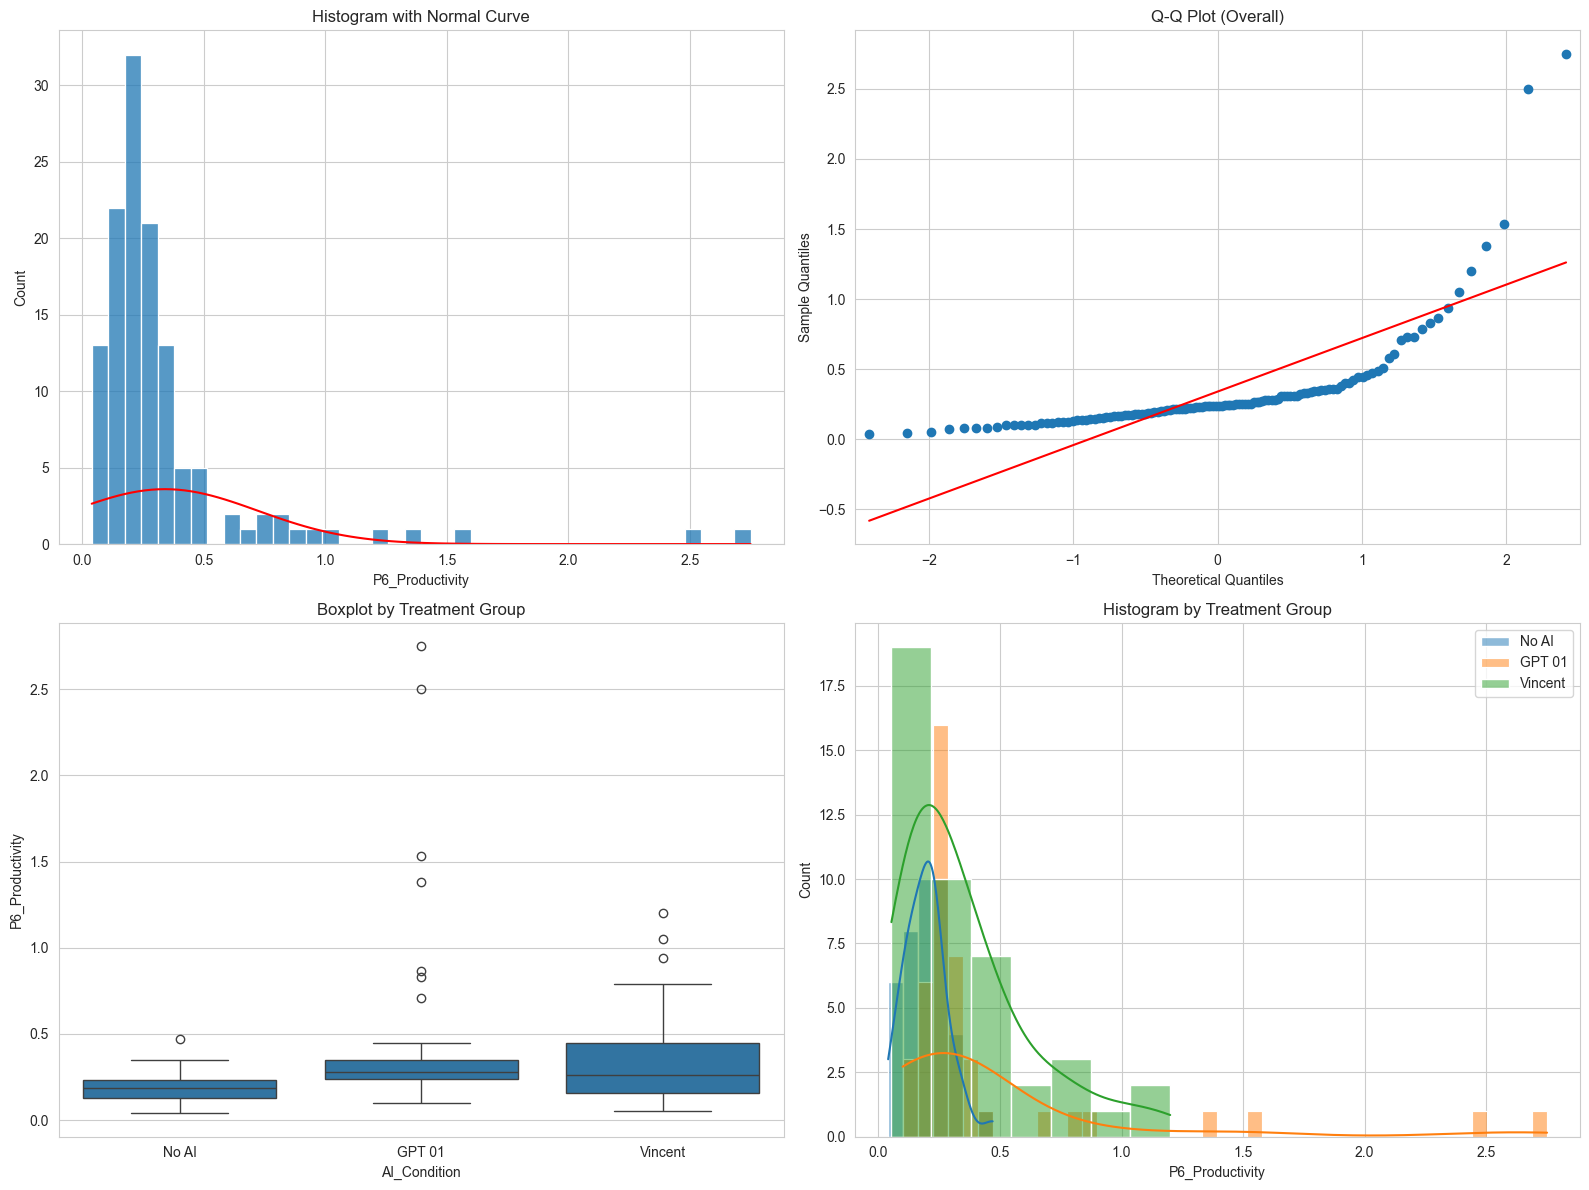


Distribution Shape Metrics:
Skewness: 4.0291 (> 0 indicates right skew, < 0 indicates left skew)
Kurtosis: 19.4627 (> 0 indicates heavy tails, < 0 indicates light tails)

Skewness and Kurtosis by Treatment Group:
No AI: Skewness=0.6990, Kurtosis=1.0719
GPT 01: Skewness=2.9531, Kurtosis=8.1791
Vincent: Skewness=1.4241, Kurtosis=1.5314


In [ ]:
# Function to test for normality
def test_normality(data, column, group_column=None):
    """
    Test for normality using multiple methods:
    1. Shapiro-Wilk test
    2. D'Agostino-Pearson test
    3. Kolmogorov-Smirnov test
    4. Anderson-Darling test
    5. Visual checks (histogram, Q-Q plot)
    """
    if group_column:
        # Test normality for each group
        groups = data[group_column].unique()
        results = {}
        
        for group in groups:
            group_data = data[data[group_column] == group][column].dropna()
            if len(group_data) >= 8:  # Shapiro-Wilk requires at least 3 samples, but more is better
                results[group] = {}
                
                # Shapiro-Wilk test
                shapiro_stat, shapiro_p = stats.shapiro(group_data)
                results[group]['shapiro'] = {'statistic': shapiro_stat, 'p-value': shapiro_p}
                
                # D'Agostino-Pearson test
                if len(group_data) >= 20:  # D'Agostino test works better with n≥20
                    dagostino_stat, dagostino_p = stats.normaltest(group_data)
                    results[group]['dagostino'] = {'statistic': dagostino_stat, 'p-value': dagostino_p}
                
                # Kolmogorov-Smirnov test
                ks_stat, ks_p = stats.kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
                results[group]['ks'] = {'statistic': ks_stat, 'p-value': ks_p}
        
        return results
    else:
        # Test normality for the entire dataset
        data_values = data[column].dropna()
        results = {}
        
        # Shapiro-Wilk test (best for n < 50)
        shapiro_stat, shapiro_p = stats.shapiro(data_values)
        results['shapiro'] = {'statistic': shapiro_stat, 'p-value': shapiro_p}
        
        # D'Agostino-Pearson test (best for n ≥ 20)
        if len(data_values) >= 20:
            dagostino_stat, dagostino_p = stats.normaltest(data_values)
            results['dagostino'] = {'statistic': dagostino_stat, 'p-value': dagostino_p}
        
        # Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.kstest(data_values, 'norm', args=(data_values.mean(), data_values.std()))
        results['ks'] = {'statistic': ks_stat, 'p-value': ks_p}
        
        # Anderson-Darling test
        ad_result = stats.anderson(data_values, dist='norm')
        results['anderson_darling'] = {
            'statistic': ad_result.statistic,
            'critical_values': ad_result.critical_values,
            'significance_levels': ad_result.significance_level
        }
        
        return results

# Run normality tests
productivity_column = 'P6_Productivity'
treatment_column = 'AI_Condition'

# Drop missing values
valid_data = task6_df.dropna(subset=[productivity_column])

# Test normality for the entire dataset
overall_results = test_normality(valid_data, productivity_column)

# Test normality for each treatment group
group_results = test_normality(valid_data, productivity_column, treatment_column)

# Display results
print("Normality Test Results for Productivity Data")
print("=" * 80)

# Overall results
print("\nOverall Dataset:")
print("-" * 40)
for test, result in overall_results.items():
    if test != 'anderson_darling':
        print(f"{test.capitalize()} test: statistic={result['statistic']:.4f}, p-value={result['p-value']:.4f}")
        if result['p-value'] < 0.05:
            print(f"  Interpretation: Data is NOT normally distributed (p < 0.05)")
        else:
            print(f"  Interpretation: Data may be normally distributed (p ≥ 0.05)")
    else:
        print(f"Anderson-Darling test: statistic={result['statistic']:.4f}")
        for i, level in enumerate(result['significance_levels']):
            critical_value = result['critical_values'][i]
            if result['statistic'] > critical_value:
                print(f"  At {level}% significance level: Data is NOT normally distributed (statistic > {critical_value:.4f})")
            else:
                print(f"  At {level}% significance level: Data may be normally distributed (statistic ≤ {critical_value:.4f})")

# Group results
print("\nResults by Treatment Group:")
for group, tests in group_results.items():
    print(f"\n{group}:")
    print("-" * 40)
    for test, result in tests.items():
        print(f"{test.capitalize()} test: statistic={result['statistic']:.4f}, p-value={result['p-value']:.4f}")
        if result['p-value'] < 0.05:
            print(f"  Interpretation: Data is NOT normally distributed (p < 0.05)")
        else:
            print(f"  Interpretation: Data may be normally distributed (p ≥ 0.05)")

# Create visualization for normality
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram with normal curve
sns.histplot(valid_data[productivity_column], kde=False, ax=axes[0, 0])
x = np.linspace(valid_data[productivity_column].min(), valid_data[productivity_column].max(), 100)
mean, std = valid_data[productivity_column].mean(), valid_data[productivity_column].std()
axes[0, 0].plot(x, stats.norm.pdf(x, mean, std) * len(valid_data) * (x[1]-x[0]), 'r-')
axes[0, 0].set_title('Histogram with Normal Curve')

# Q-Q plot (overall)
qqplot(valid_data[productivity_column], line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Overall)')

# Box plots by group
sns.boxplot(x=treatment_column, y=productivity_column, data=valid_data, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot by Treatment Group')

# Histogram by group
for i, group in enumerate(valid_data[treatment_column].unique()):
    group_data = valid_data[valid_data[treatment_column] == group][productivity_column]
    sns.histplot(group_data, kde=True, ax=axes[1, 1], alpha=0.5, label=group)
axes[1, 1].set_title('Histogram by Treatment Group')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Skewness and kurtosis for the overall distribution
skewness = stats.skew(valid_data[productivity_column].dropna())
kurtosis = stats.kurtosis(valid_data[productivity_column].dropna())

print("\nDistribution Shape Metrics:")
print(f"Skewness: {skewness:.4f} (> 0 indicates right skew, < 0 indicates left skew)")
print(f"Kurtosis: {kurtosis:.4f} (> 0 indicates heavy tails, < 0 indicates light tails)")

# Run skewness and kurtosis by group
print("\nSkewness and Kurtosis by Treatment Group:")
for group in valid_data[treatment_column].unique():
    group_data = valid_data[valid_data[treatment_column] == group][productivity_column].dropna()
    if len(group_data) > 0:
        group_skew = stats.skew(group_data)
        group_kurt = stats.kurtosis(group_data)
        print(f"{group}: Skewness={group_skew:.4f}, Kurtosis={group_kurt:.4f}")


ANALYSIS OF PRODUCTIVITY

Normality Test Results for Productivity Data

Overall Dataset:
----------------------------------------
Shapiro test: statistic=0.5567, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Dagostino test: statistic=138.4099, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Ks test: statistic=0.2796, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Anderson-Darling test: statistic=16.2314
  At 15.0% significance level: Data is NOT normally distributed (statistic > 0.5590)
  At 10.0% significance level: Data is NOT normally distributed (statistic > 0.6370)
  At 5.0% significance level: Data is NOT normally distributed (statistic > 0.7640)
  At 2.5% significance level: Data is NOT normally distributed (statistic > 0.8910)
  At 1.0% significance level: Data is NOT normally distributed (statistic > 1.0600)

Productivity Normality Results by Treatment Group:

No AI:
--------------------

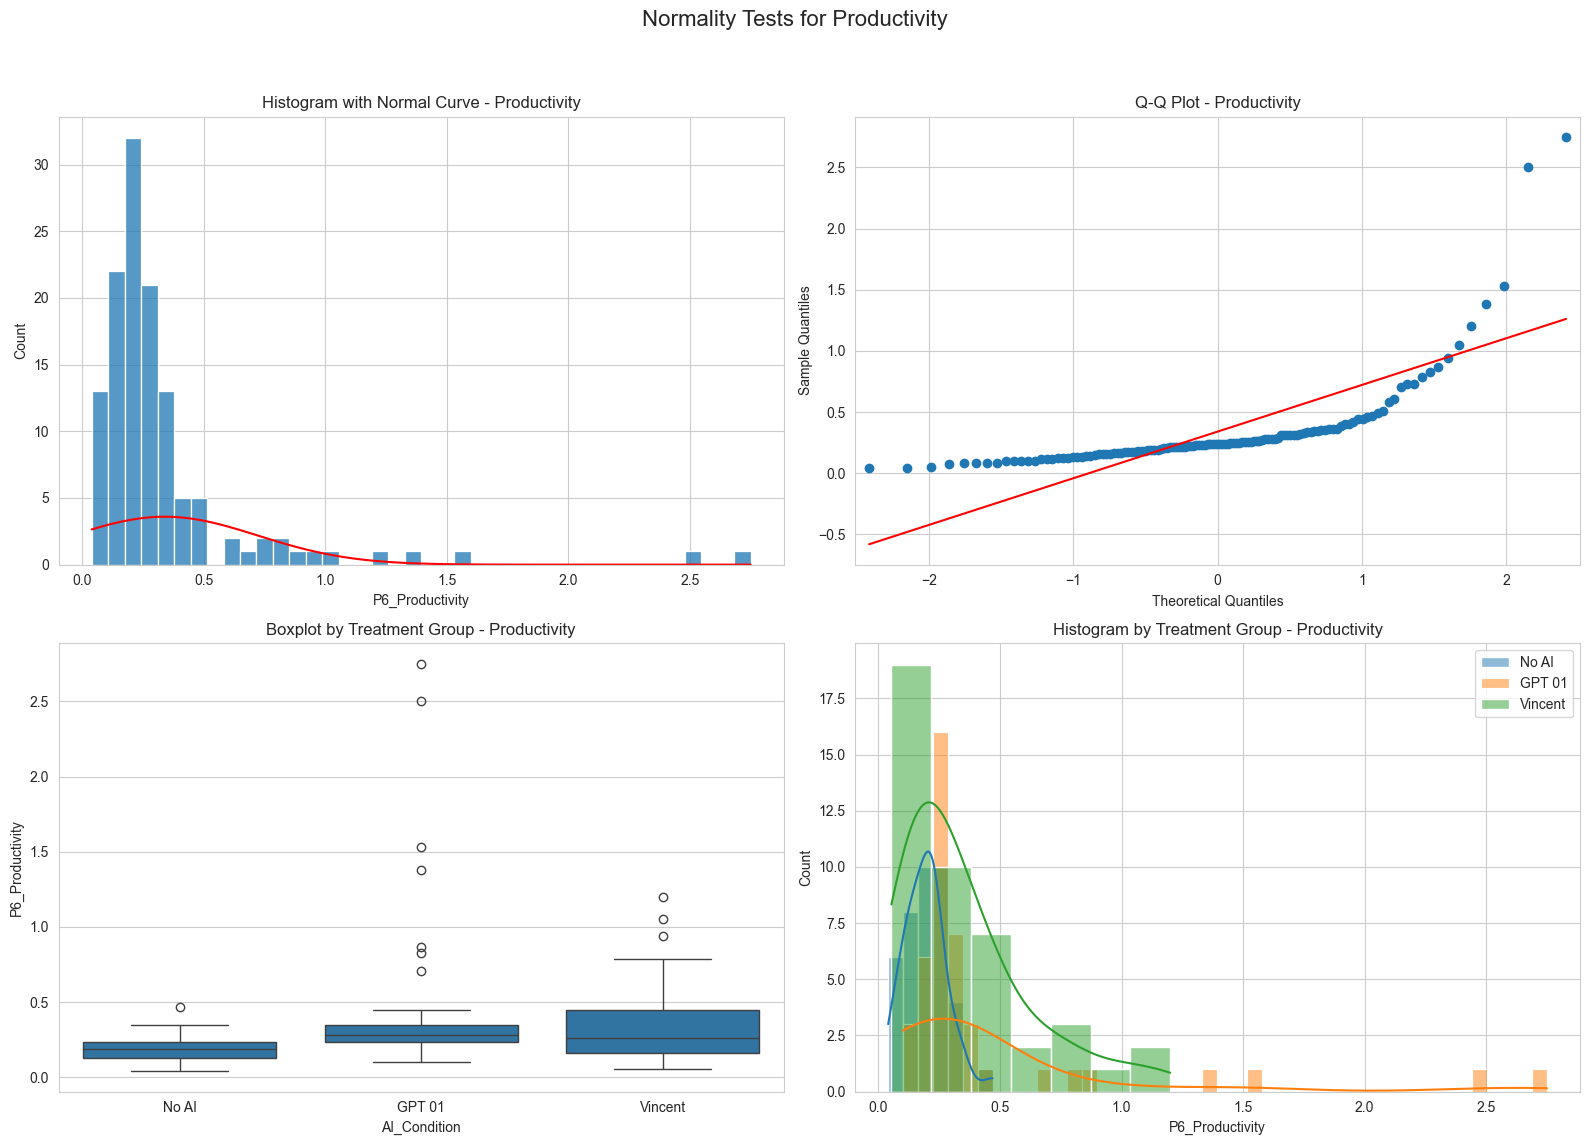


Distribution Shape Metrics for Productivity:
Skewness: 4.0291 (> 0 indicates right skew, < 0 indicates left skew)
Kurtosis: 19.4627 (> 0 indicates heavy tails, < 0 indicates light tails)

Skewness and Kurtosis by Treatment Group for Productivity:
No AI: Skewness=0.6990, Kurtosis=1.0719
GPT 01: Skewness=2.9531, Kurtosis=8.1791
Vincent: Skewness=1.4241, Kurtosis=1.5314


ANALYSIS OF TIME SPENT

Normality Test Results for Time Spent Data

Overall Dataset:
----------------------------------------
Shapiro test: statistic=0.9640, p-value=0.0020
  Interpretation: Data is NOT normally distributed (p < 0.05)
Dagostino test: statistic=12.2873, p-value=0.0021
  Interpretation: Data is NOT normally distributed (p < 0.05)
Ks test: statistic=0.0580, p-value=0.7676
  Interpretation: Data may be normally distributed (p ≥ 0.05)
Anderson-Darling test: statistic=0.7975
  At 15.0% significance level: Data is NOT normally distributed (statistic > 0.5590)
  At 10.0% significance level: Data is NOT normally

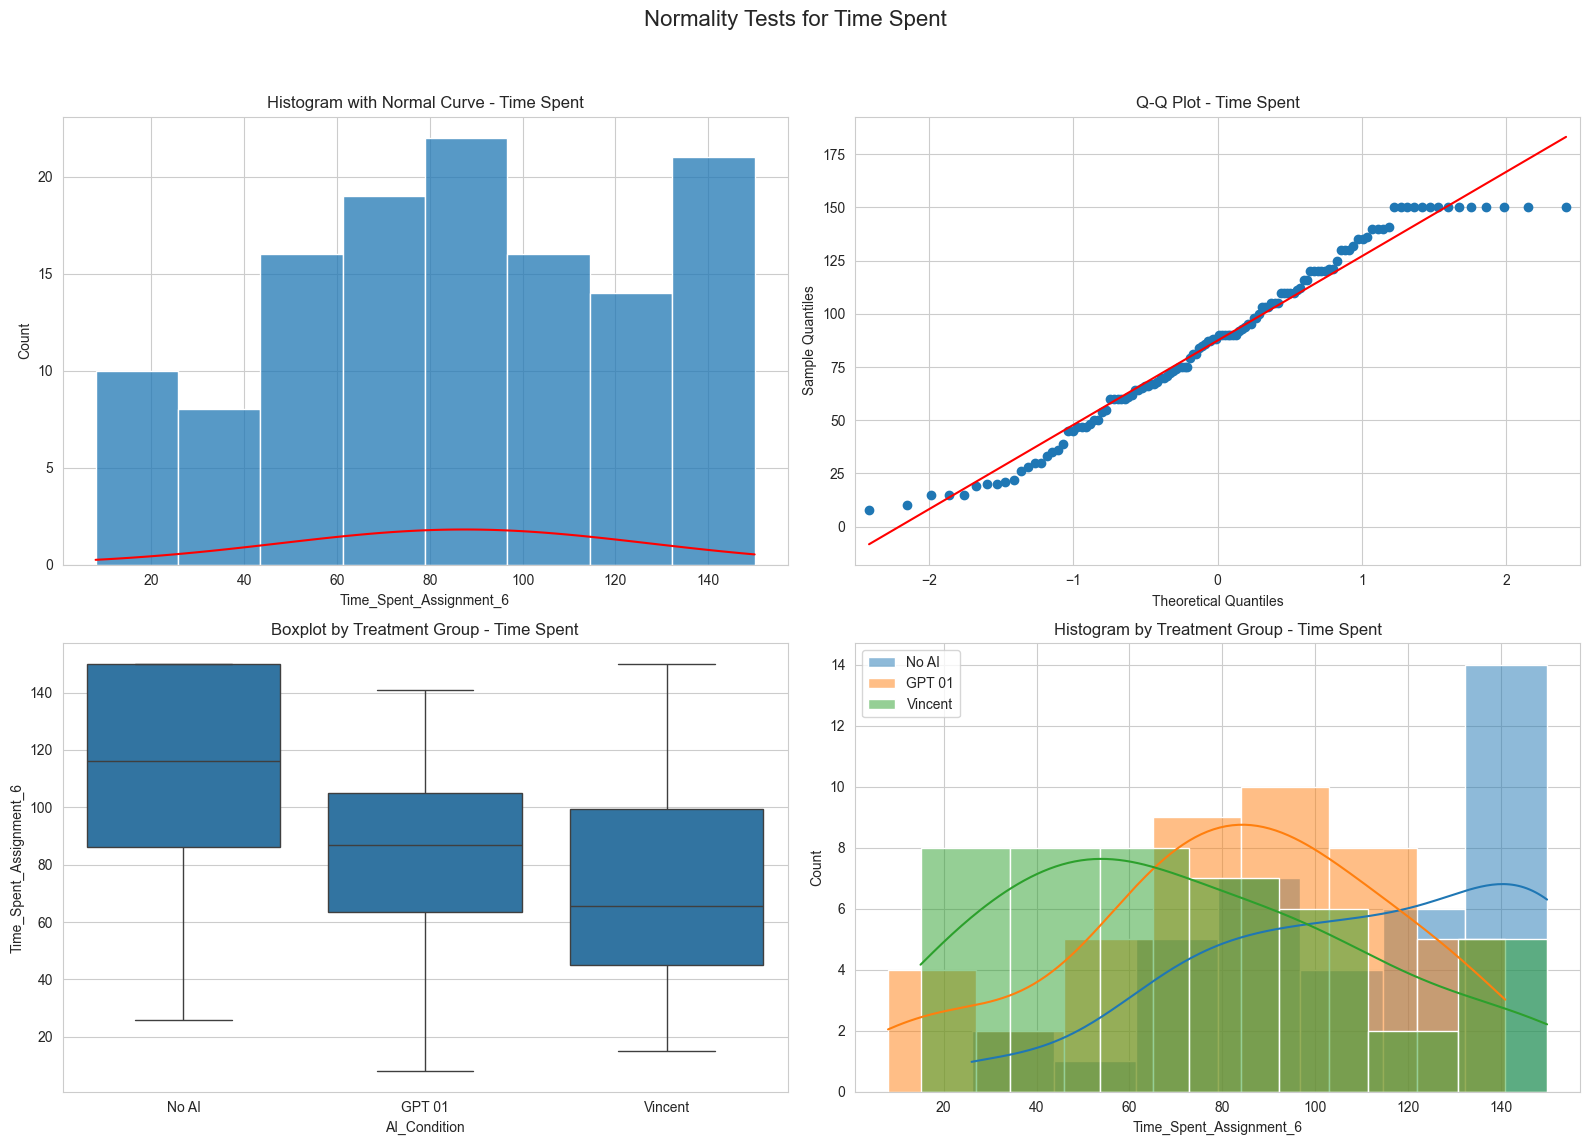


Distribution Shape Metrics for Time Spent:
Skewness: -0.0880 (> 0 indicates right skew, < 0 indicates left skew)
Kurtosis: -0.8976 (> 0 indicates heavy tails, < 0 indicates light tails)

Skewness and Kurtosis by Treatment Group for Time Spent:
No AI: Skewness=-0.5633, Kurtosis=-0.5828
GPT 01: Skewness=-0.3656, Kurtosis=-0.4490
Vincent: Skewness=0.4084, Kurtosis=-0.7661


ANALYSIS OF TOTAL SCORE

Normality Test Results for Total Score Data

Overall Dataset:
----------------------------------------
Shapiro test: statistic=0.9679, p-value=0.0043
  Interpretation: Data is NOT normally distributed (p < 0.05)
Dagostino test: statistic=23.0050, p-value=0.0000
  Interpretation: Data is NOT normally distributed (p < 0.05)
Ks test: statistic=0.0930, p-value=0.2119
  Interpretation: Data may be normally distributed (p ≥ 0.05)
Anderson-Darling test: statistic=1.1989
  At 15.0% significance level: Data is NOT normally distributed (statistic > 0.5590)
  At 10.0% significance level: Data is NOT norm

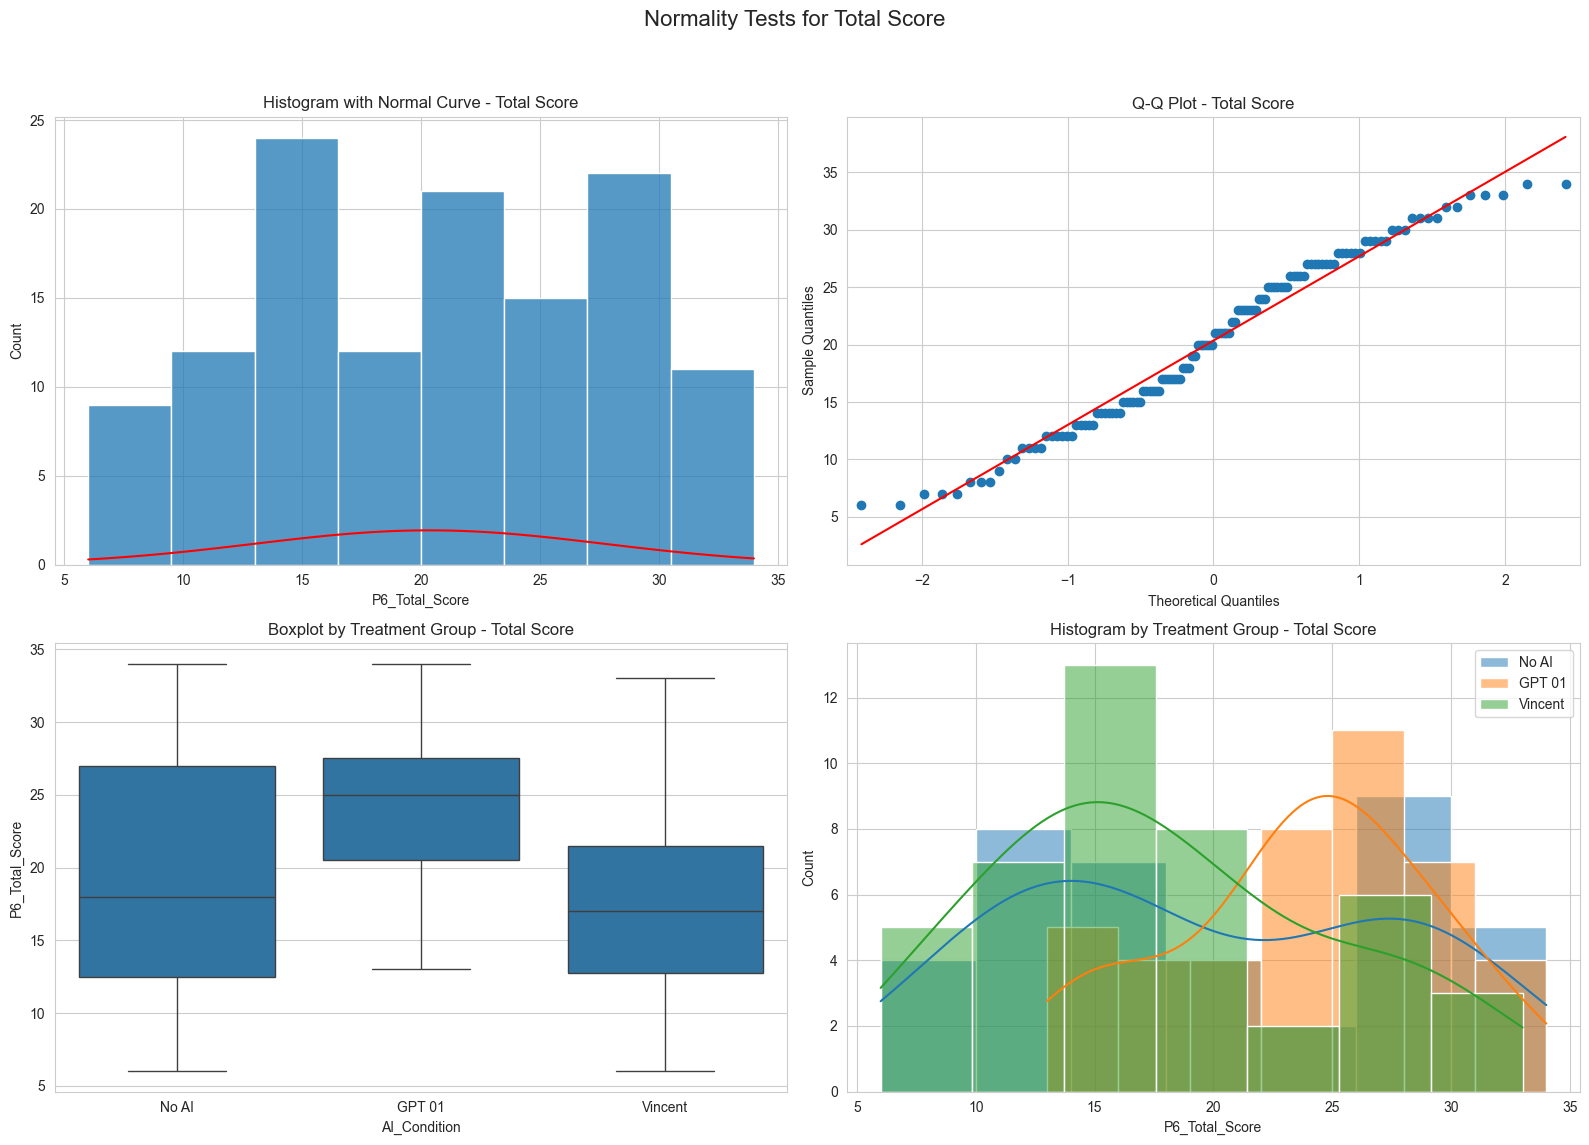


Distribution Shape Metrics for Total Score:
Skewness: -0.0522 (> 0 indicates right skew, < 0 indicates left skew)
Kurtosis: -1.0438 (> 0 indicates heavy tails, < 0 indicates light tails)

Skewness and Kurtosis by Treatment Group for Total Score:
No AI: Skewness=0.1251, Kurtosis=-1.2588
GPT 01: Skewness=-0.2819, Kurtosis=-0.6486
Vincent: Skewness=0.3819, Kurtosis=-0.7399


SUMMARY AND RECOMMENDATIONS
Based on the normality tests performed, here are the recommendations for outlier detection:

Productivity:
  Normality (Shapiro-Wilk p-value): 0.0000 (NOT Normal)
  Skewness: 4.0291 (Highly skewed)
  Kurtosis: 19.4627 (Heavy tailed)
  Recommended outlier detection: IQR method (significantly non-normal)

Time Spent:
  Normality (Shapiro-Wilk p-value): 0.0020 (NOT Normal)
  Skewness: -0.0880 (Approximately symmetric)
  Kurtosis: -0.8976 (Normal tails)
  Recommended outlier detection: Either method, but IQR preferred for robustness

Total Score:
  Normality (Shapiro-Wilk p-value): 0.0043 (NOT

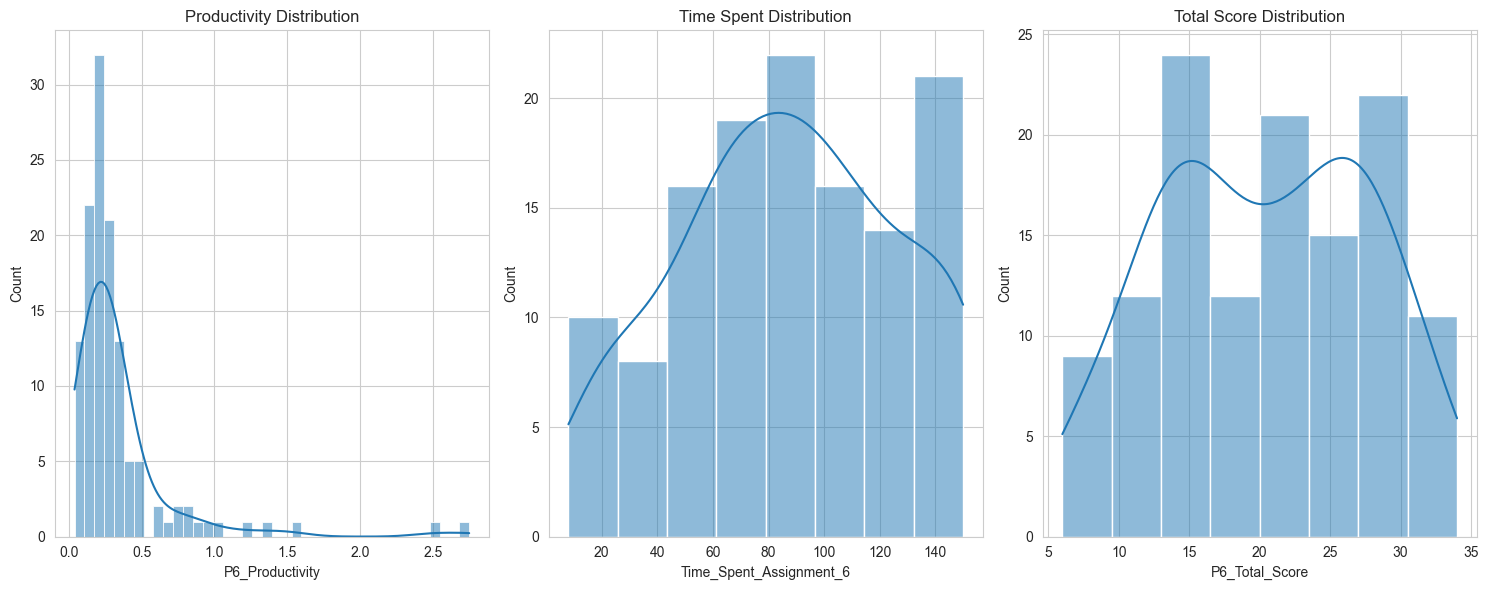

In [ ]:
# Function to test for normality
def test_normality(data, column, group_column=None):
    """
    Test for normality using multiple methods:
    1. Shapiro-Wilk test
    2. D'Agostino-Pearson test
    3. Kolmogorov-Smirnov test
    4. Anderson-Darling test
    """
    if group_column:
        # Test normality for each group
        groups = data[group_column].unique()
        results = {}
        
        for group in groups:
            group_data = data[data[group_column] == group][column].dropna()
            if len(group_data) >= 8:  # Shapiro-Wilk requires at least 3 samples, but more is better
                results[group] = {}
                
                # Shapiro-Wilk test
                shapiro_stat, shapiro_p = stats.shapiro(group_data)
                results[group]['shapiro'] = {'statistic': shapiro_stat, 'p-value': shapiro_p}
                
                # D'Agostino-Pearson test
                if len(group_data) >= 20:  # D'Agostino test works better with n≥20
                    dagostino_stat, dagostino_p = stats.normaltest(group_data)
                    results[group]['dagostino'] = {'statistic': dagostino_stat, 'p-value': dagostino_p}
                
                # Kolmogorov-Smirnov test
                ks_stat, ks_p = stats.kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
                results[group]['ks'] = {'statistic': ks_stat, 'p-value': ks_p}
        
        return results
    else:
        # Test normality for the entire dataset
        data_values = data[column].dropna()
        results = {}
        
        # Shapiro-Wilk test (best for n < 50)
        shapiro_stat, shapiro_p = stats.shapiro(data_values)
        results['shapiro'] = {'statistic': shapiro_stat, 'p-value': shapiro_p}
        
        # D'Agostino-Pearson test (best for n ≥ 20)
        if len(data_values) >= 20:
            dagostino_stat, dagostino_p = stats.normaltest(data_values)
            results['dagostino'] = {'statistic': dagostino_stat, 'p-value': dagostino_p}
        
        # Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.kstest(data_values, 'norm', args=(data_values.mean(), data_values.std()))
        results['ks'] = {'statistic': ks_stat, 'p-value': ks_p}
        
        # Anderson-Darling test
        ad_result = stats.anderson(data_values, dist='norm')
        results['anderson_darling'] = {
            'statistic': ad_result.statistic,
            'critical_values': ad_result.critical_values,
            'significance_levels': ad_result.significance_level
        }
        
        return results

# Function to display normality test results
def display_normality_results(results, title):
    print(f"\n{title}")
    print("=" * 80)
    
    # Overall results
    print("\nOverall Dataset:")
    print("-" * 40)
    for test, result in results.items():
        if test != 'anderson_darling':
            print(f"{test.capitalize()} test: statistic={result['statistic']:.4f}, p-value={result['p-value']:.4f}")
            if result['p-value'] < 0.05:
                print(f"  Interpretation: Data is NOT normally distributed (p < 0.05)")
            else:
                print(f"  Interpretation: Data may be normally distributed (p ≥ 0.05)")
        else:
            print(f"Anderson-Darling test: statistic={result['statistic']:.4f}")
            for i, level in enumerate(result['significance_levels']):
                critical_value = result['critical_values'][i]
                if result['statistic'] > critical_value:
                    print(f"  At {level}% significance level: Data is NOT normally distributed (statistic > {critical_value:.4f})")
                else:
                    print(f"  At {level}% significance level: Data may be normally distributed (statistic ≤ {critical_value:.4f})")

# Function to display normality test results by group
def display_group_normality_results(group_results, title):
    print(f"\n{title} by Treatment Group:")
    for group, tests in group_results.items():
        print(f"\n{group}:")
        print("-" * 40)
        for test, result in tests.items():
            print(f"{test.capitalize()} test: statistic={result['statistic']:.4f}, p-value={result['p-value']:.4f}")
            if result['p-value'] < 0.05:
                print(f"  Interpretation: Data is NOT normally distributed (p < 0.05)")
            else:
                print(f"  Interpretation: Data may be normally distributed (p ≥ 0.05)")

# Function to create normality visualization plots
def create_normality_plots(data, column, treatment_column, title):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Set overall title
    fig.suptitle(f'Normality Tests for {title}', fontsize=16)
    
    # Histogram with normal curve
    sns.histplot(data[column], kde=False, ax=axes[0, 0])
    x = np.linspace(data[column].min(), data[column].max(), 100)
    mean, std = data[column].mean(), data[column].std()
    axes[0, 0].plot(x, stats.norm.pdf(x, mean, std) * len(data) * (x[1]-x[0]), 'r-')
    axes[0, 0].set_title(f'Histogram with Normal Curve - {title}')
    
    # Q-Q plot (overall)
    qqplot(data[column], line='s', ax=axes[0, 1])
    axes[0, 1].set_title(f'Q-Q Plot - {title}')
    
    # Box plots by group
    sns.boxplot(x=treatment_column, y=column, data=data, ax=axes[1, 0])
    axes[1, 0].set_title(f'Boxplot by Treatment Group - {title}')
    
    # Histogram by group
    for i, group in enumerate(data[treatment_column].unique()):
        group_data = data[data[treatment_column] == group][column]
        sns.histplot(group_data, kde=True, ax=axes[1, 1], alpha=0.5, label=group)
    axes[1, 1].set_title(f'Histogram by Treatment Group - {title}')
    axes[1, 1].legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
    plt.show()

# Function to calculate and display distribution shape metrics
def display_shape_metrics(data, column, treatment_column, title):
    skewness = stats.skew(data[column].dropna())
    kurtosis = stats.kurtosis(data[column].dropna())
    
    print(f"\nDistribution Shape Metrics for {title}:")
    print(f"Skewness: {skewness:.4f} (> 0 indicates right skew, < 0 indicates left skew)")
    print(f"Kurtosis: {kurtosis:.4f} (> 0 indicates heavy tails, < 0 indicates light tails)")
    
    # By group
    print(f"\nSkewness and Kurtosis by Treatment Group for {title}:")
    for group in data[treatment_column].unique():
        group_data = data[data[treatment_column] == group][column].dropna()
        if len(group_data) > 0:
            group_skew = stats.skew(group_data)
            group_kurt = stats.kurtosis(group_data)
            print(f"{group}: Skewness={group_skew:.4f}, Kurtosis={group_kurt:.4f}")

# Define the columns we need
productivity_column = 'P6_Productivity'
time_spent_column = 'Time_Spent_Assignment_6'
total_score_column = 'P6_Total_Score'
treatment_column = 'AI_Condition'

# Drop rows with missing values for each variable separately
valid_productivity_data = task6_df.dropna(subset=[productivity_column])
valid_time_data = task6_df.dropna(subset=[time_spent_column])
valid_score_data = task6_df.dropna(subset=[total_score_column])

# ----------------------
# 1. Productivity Analysis
# ----------------------
print("\nANALYSIS OF PRODUCTIVITY")
print("========================")

# Test normality for productivity
overall_productivity_results = test_normality(valid_productivity_data, productivity_column)
group_productivity_results = test_normality(valid_productivity_data, productivity_column, treatment_column)

# Display results
display_normality_results(overall_productivity_results, "Normality Test Results for Productivity Data")
display_group_normality_results(group_productivity_results, "Productivity Normality Results")

# Create visualization for normality
create_normality_plots(valid_productivity_data, productivity_column, treatment_column, "Productivity")

# Distribution shape metrics
display_shape_metrics(valid_productivity_data, productivity_column, treatment_column, "Productivity")

# ----------------------
# 2. Time Spent Analysis
# ----------------------
print("\n\nANALYSIS OF TIME SPENT")
print("=====================")

# Test normality for time spent
overall_time_results = test_normality(valid_time_data, time_spent_column)
group_time_results = test_normality(valid_time_data, time_spent_column, treatment_column)

# Display results
display_normality_results(overall_time_results, "Normality Test Results for Time Spent Data")
display_group_normality_results(group_time_results, "Time Spent Normality Results")

# Create visualization for normality
create_normality_plots(valid_time_data, time_spent_column, treatment_column, "Time Spent")

# Distribution shape metrics
display_shape_metrics(valid_time_data, time_spent_column, treatment_column, "Time Spent")

# ----------------------
# 3. Total Score Analysis
# ----------------------
print("\n\nANALYSIS OF TOTAL SCORE")
print("======================")

# Test normality for total score
overall_score_results = test_normality(valid_score_data, total_score_column)
group_score_results = test_normality(valid_score_data, total_score_column, treatment_column)

# Display results
display_normality_results(overall_score_results, "Normality Test Results for Total Score Data")
display_group_normality_results(group_score_results, "Total Score Normality Results")

# Create visualization for normality
create_normality_plots(valid_score_data, total_score_column, treatment_column, "Total Score")

# Distribution shape metrics
display_shape_metrics(valid_score_data, total_score_column, treatment_column, "Total Score")

# ----------------------
# 4. Summary and Recommendations
# ----------------------
print("\n\nSUMMARY AND RECOMMENDATIONS")
print("===========================")
print("Based on the normality tests performed, here are the recommendations for outlier detection:")

variables = [
    {"name": "Productivity", "column": productivity_column, "data": valid_productivity_data},
    {"name": "Time Spent", "column": time_spent_column, "data": valid_time_data},
    {"name": "Total Score", "column": total_score_column, "data": valid_score_data}
]

for var in variables:
    # Get skewness and kurtosis
    skew = stats.skew(var["data"][var["column"]].dropna())
    kurt = stats.kurtosis(var["data"][var["column"]].dropna())
    
    # Get p-value from Shapiro-Wilk test
    shapiro_p = test_normality(var["data"], var["column"])["shapiro"]["p-value"]
    
    # Determine if normal based on Shapiro-Wilk test
    is_normal = shapiro_p >= 0.05
    
    # Make recommendation
    if is_normal:
        recommendation = "Z-score method (normally distributed)"
    elif abs(skew) > 1 or kurt > 1:
        recommendation = "IQR method (significantly non-normal)"
    else:
        recommendation = "Either method, but IQR preferred for robustness"
    
    print(f"\n{var['name']}:")
    print(f"  Normality (Shapiro-Wilk p-value): {shapiro_p:.4f} ({'Normal' if is_normal else 'NOT Normal'})")
    print(f"  Skewness: {skew:.4f} ({abs(skew) > 1 and 'Highly skewed' or (abs(skew) > 0.5 and 'Moderately skewed' or 'Approximately symmetric')})")
    print(f"  Kurtosis: {kurt:.4f} ({kurt > 1 and 'Heavy tailed' or (kurt < -1 and 'Light tailed' or 'Normal tails')})")
    print(f"  Recommended outlier detection: {recommendation}")

# Create a summary distribution comparison plot
plt.figure(figsize=(15, 6))

# Create subplots for each variable
plt.subplot(1, 3, 1)
sns.histplot(valid_productivity_data[productivity_column], kde=True)
plt.title("Productivity Distribution")

plt.subplot(1, 3, 2)
sns.histplot(valid_time_data[time_spent_column], kde=True)
plt.title("Time Spent Distribution")

plt.subplot(1, 3, 3)
sns.histplot(valid_score_data[total_score_column], kde=True)
plt.title("Total Score Distribution")

plt.tight_layout()
plt.show()